# **Student Performance Indicator**
## **Life cycle of Machine learning Project**


*   Understanding the Problem Statement
*   Data Collection

*   Data Checks to perform
*   Exploratory data analysis

*   Data Pre-Processing
*   Model Training

*   Choose best model

**1) Problem statement**

*   This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

**2) Data Collection**
*   Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

# **Import Data and Required Packages**

In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

**Import the csv DataSet**

In [309]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (3).csv


In [310]:
data = pd.read_csv("StudentsPerformance.csv")

**Show Top 5 Rows**

In [311]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Show Last 5 ROws**

In [312]:
data.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [313]:
data.shape

(1000, 8)

# **Dataset information**


*   **gender** : sex of students -> (Male/female)

*   **race/ethnicity** : ethnicity of students -> (Group A, B,C, D,E)
*   **parental level of education** : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
*   **parental level of education** : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
*   **test preparation course** : complete or not complete before test
*   **math score**
*   **reading score**
*   **writing score**


**Check MissingValues   and   DuplicteValues**

In [314]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


No Null Value in DataSet

In [315]:
data.duplicated().sum()

0

No Duplicate value in DataSet

**Check DataTypes**

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Check number of unique values in eaxh object column**

In [317]:
for i in data.columns:
  if data[i].dtypes == "object":
    print(f"Number of NUnique Values in {[i]} feature is  -->>  {data[i].nunique()} and values -->> {data[i].unique()}")

Number of NUnique Values in ['gender'] feature is  -->>  2 and values -->> ['female' 'male']
Number of NUnique Values in ['race/ethnicity'] feature is  -->>  5 and values -->> ['group B' 'group C' 'group A' 'group D' 'group E']
Number of NUnique Values in ['parental level of education'] feature is  -->>  6 and values -->> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Number of NUnique Values in ['lunch'] feature is  -->>  2 and values -->> ['standard' 'free/reduced']
Number of NUnique Values in ['test preparation course'] feature is  -->>  2 and values -->> ['none' 'completed']


**Check statistics of data set**

In [318]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Exploring Data**

In [319]:
num_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
cet_featue = [feature for feature in data.columns if data[feature].dtypes=="O"]

print("We have {} numerical features {}".format(len(num_feature) , num_feature))
print("We have {} cetogorial feature {}".format(len(cet_featue) , cet_featue))

We have 3 numerical features ['math score', 'reading score', 'writing score']
We have 5 cetogorial feature ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


**Adding "Total_Score and Average" Columns**

In [320]:
data["Total_Score"] = data["math score"] + data["reading score"] + data["writing score"]
data["Average"] = data["Total_Score"]/3

In [321]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [322]:
math_less_20 = data[data["math score"]<=20]["Average"].count()
reading_less_20 = data[data["reading score"]<=20]["Average"].count()
writing_less_20 = data[data['writing score']<=20]["Average"].count()

print("Number of Student with less then 20 score in math  -->> ",math_less_20)
print("Number of Student with less then 20 score in reading -->> ",reading_less_20)
print("Number of Student with less then 20 score in writing -->> ",writing_less_20)

Number of Student with less then 20 score in math  -->>  4
Number of Student with less then 20 score in reading -->>  1
Number of Student with less then 20 score in writing -->>  3


In [323]:
math_full_100 = data[data["math score"]==100]["Average"].count()
reading_full_100 = data[data["reading score"]==100]["Average"].count()
writing_full_100 = data[data["writing score"]==100]["Average"].count()

print("Number of Student with score in math  -->> ",math_full_100)
print("Number of Student with score in math  -->> ",reading_full_100)
print("Number of Student with score in math  -->> ",writing_full_100)

Number of Student with score in math  -->>  7
Number of Student with score in math  -->>  17
Number of Student with score in math  -->>  14


**Insights**

*   From above values we get students have performed the worst in Maths
*   Best performance is in reading section

# **Exploring Data ( Visualization )**

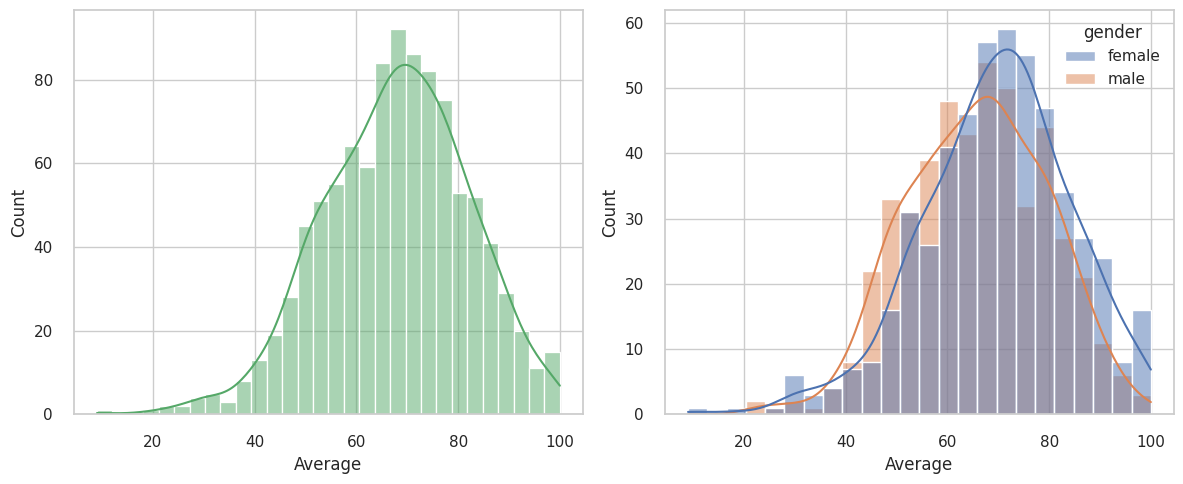

In [324]:
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sns.histplot(x =data["Average"] ,bins=30 ,kde=True ,color='g')

plt.subplot(1,2,2)
sns.histplot(x =data["Average"] ,kde=True , hue=data['gender'])

plt.tight_layout()
plt.show()

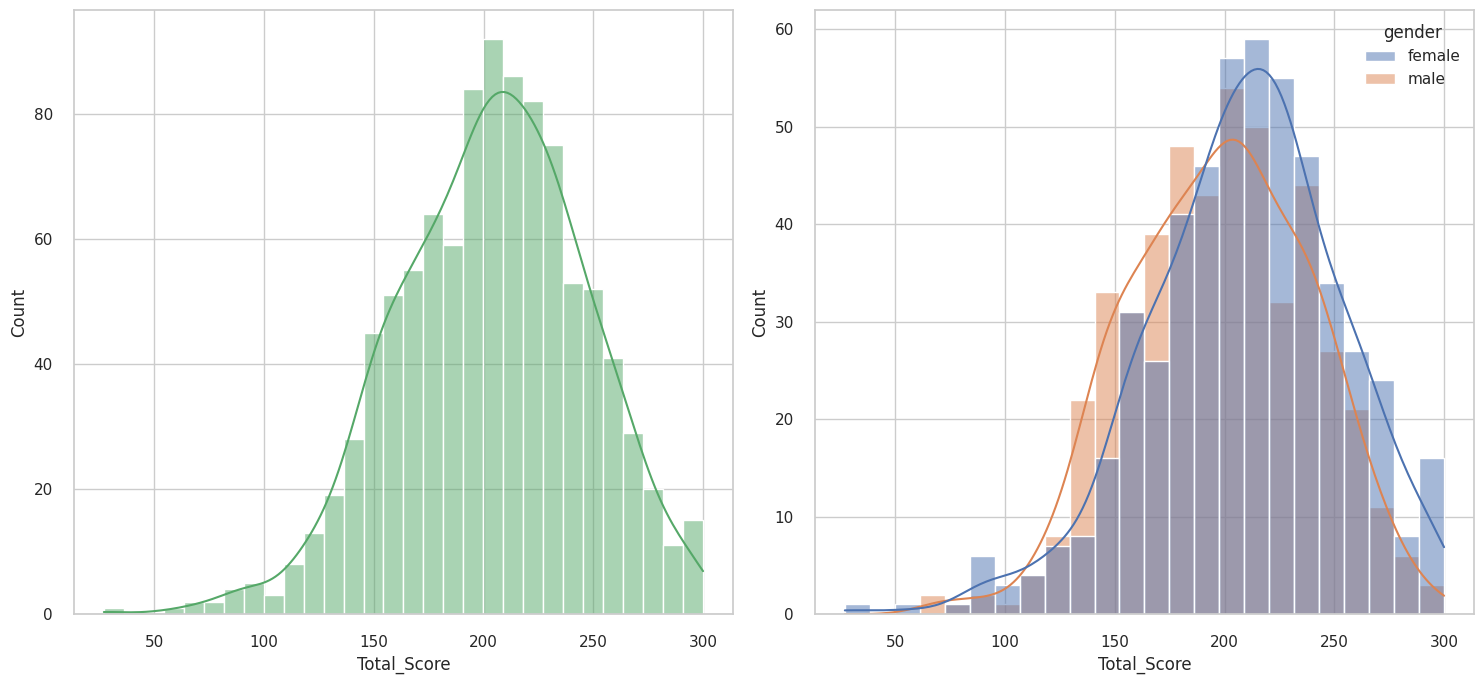

In [325]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(x =data["Total_Score"],bins=30 ,kde=True ,color='g')

plt.subplot(122)
sns.histplot(x =data["Total_Score"] ,kde=True , hue=data['gender'])

plt.tight_layout()
plt.show()

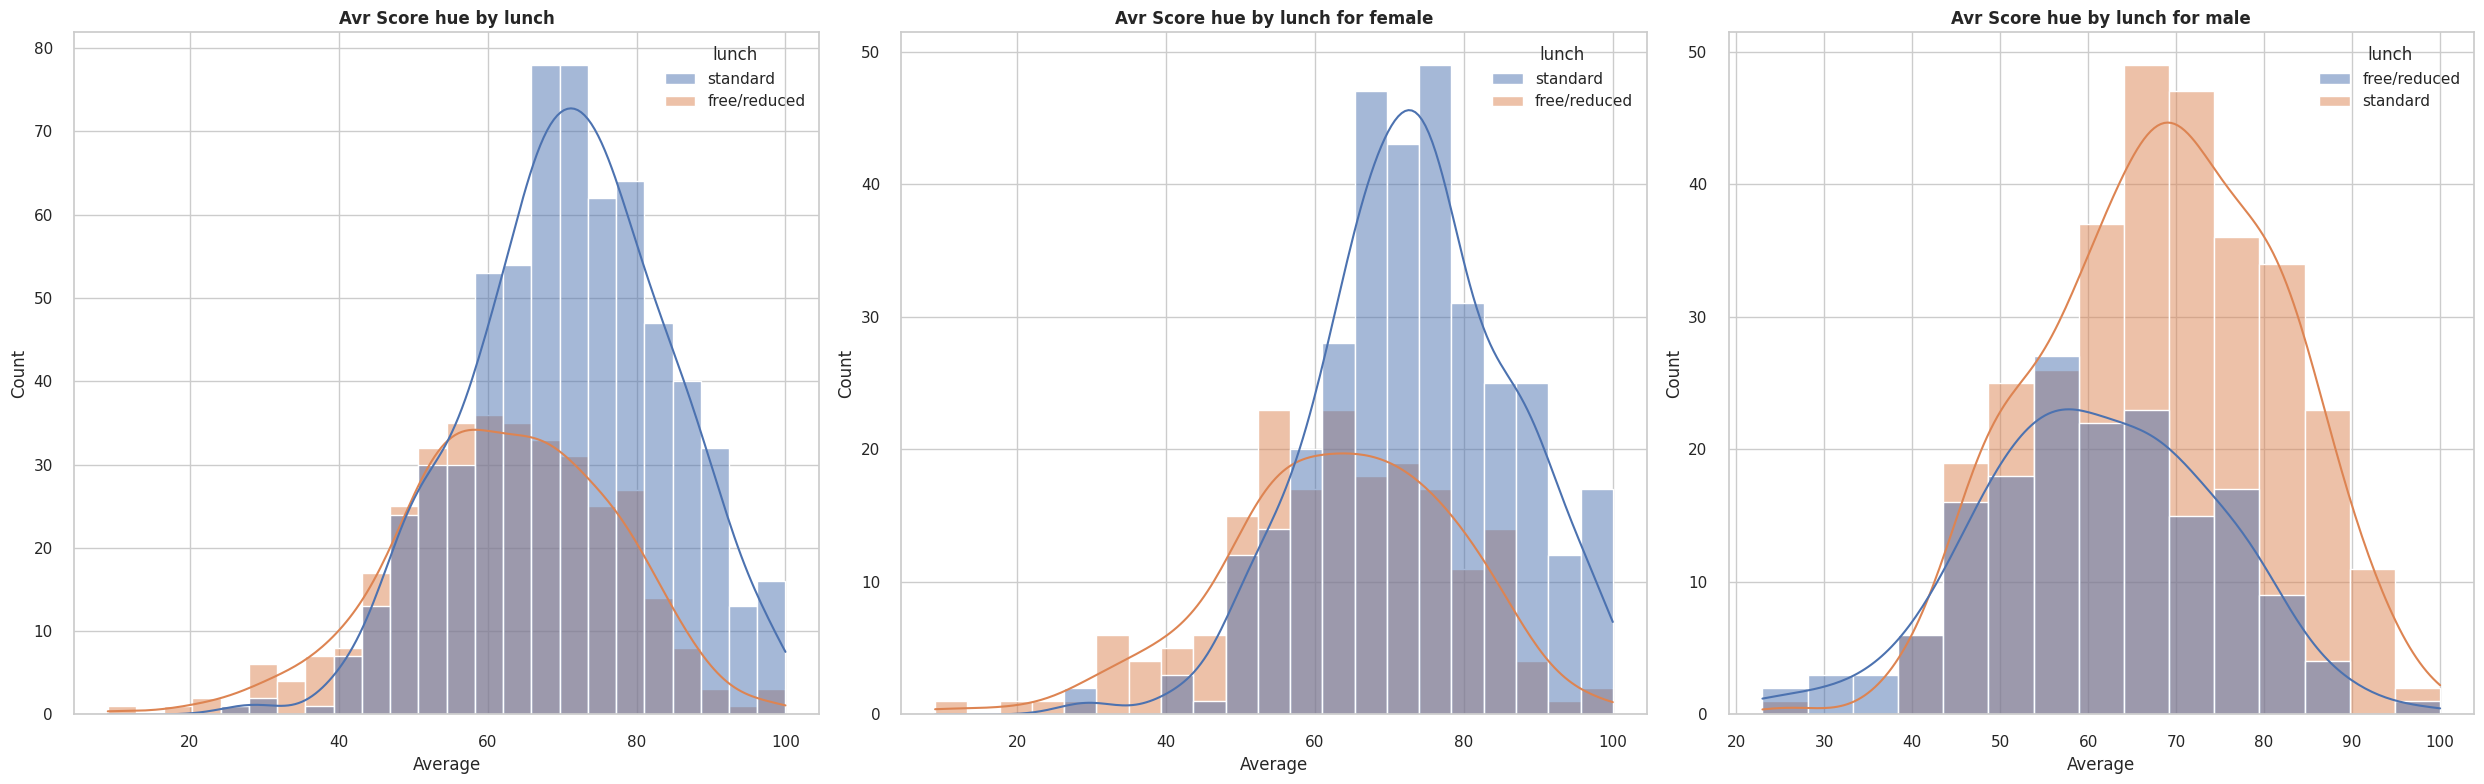

In [326]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.histplot(x=data['Average'] , kde=True , hue =data["lunch"])
plt.title("Avr Score hue by lunch",fontweight="bold")

plt.subplot(132)
sns.histplot(data=data[data['gender']=='female'] , x='Average',kde=True ,hue='lunch')
plt.title("Avr Score hue by lunch for female",fontweight="bold")

plt.subplot(133)
sns.histplot(data=data[data['gender']=='male'] , x='Average',kde=True ,hue='lunch')
plt.title("Avr Score hue by lunch for male",fontweight="bold")

plt.tight_layout()
plt.show()

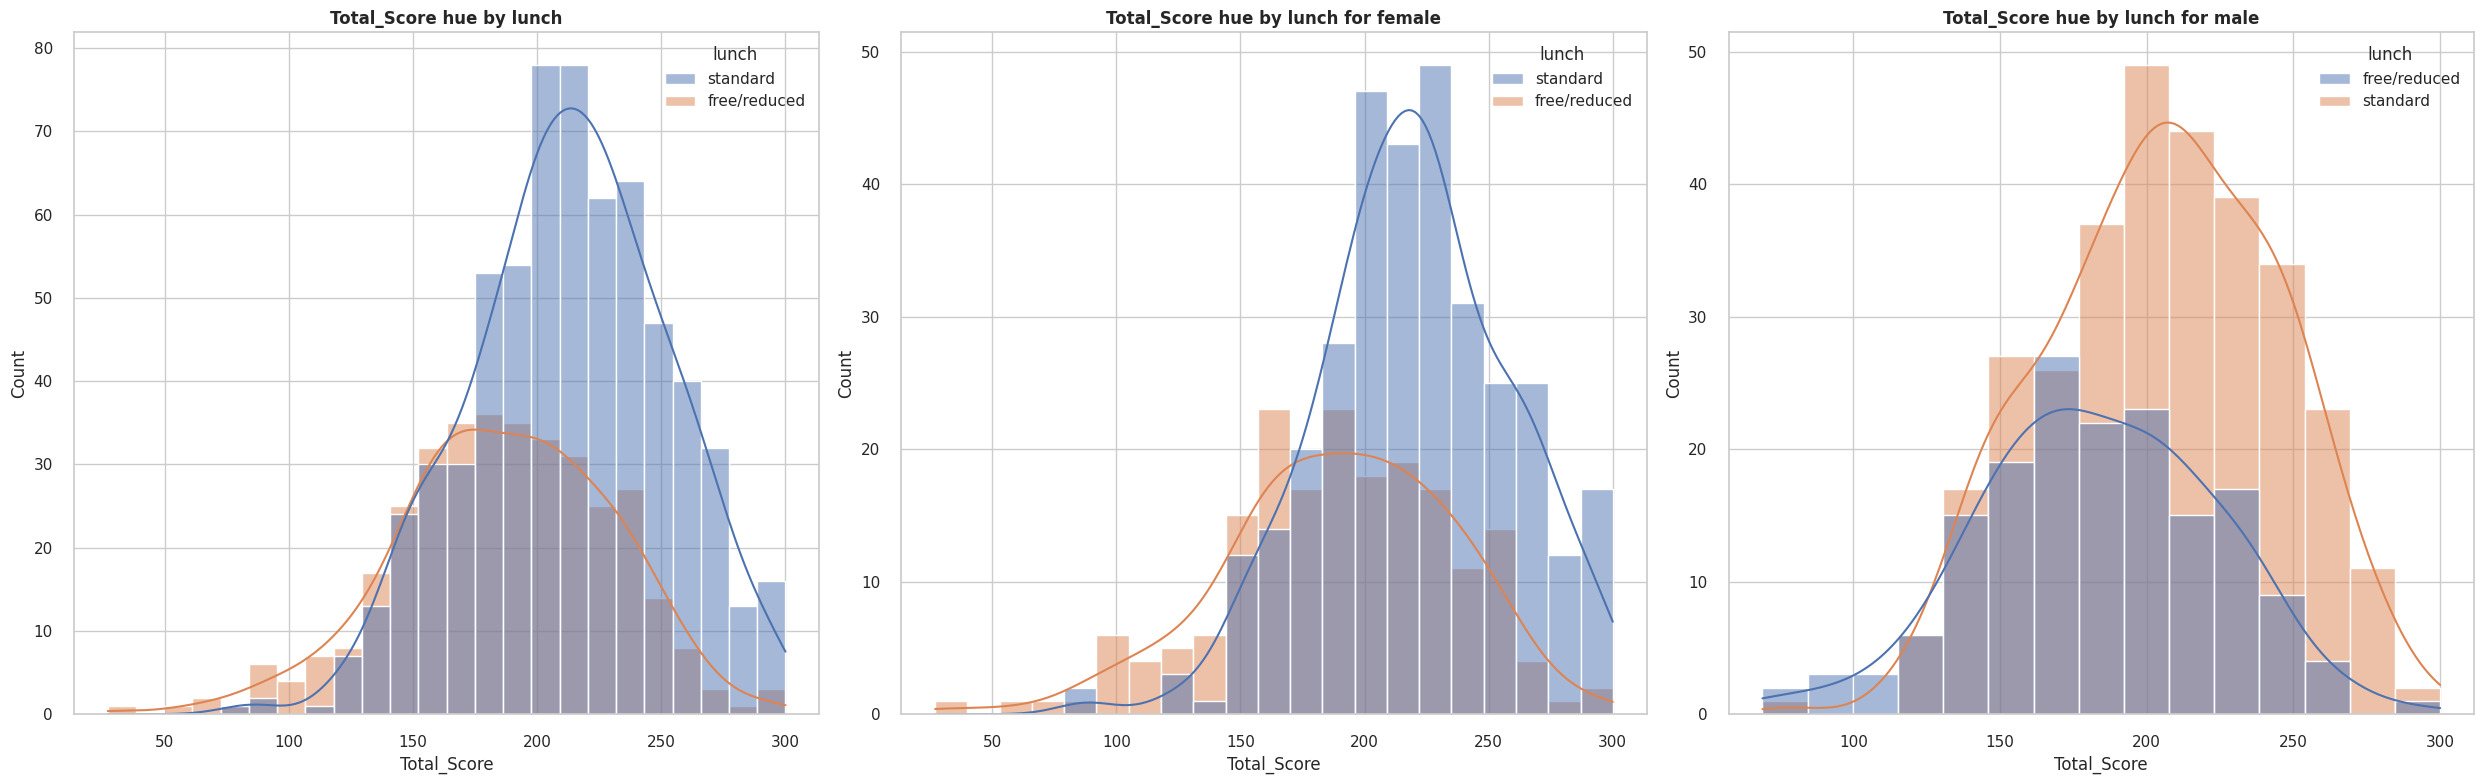

In [327]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.histplot(x=data['Total_Score'] , kde=True , hue =data["lunch"])
plt.title("Total_Score hue by lunch",fontweight="bold")

plt.subplot(132)
sns.histplot(data=data[data['gender']=='female'] , x='Total_Score',kde=True ,hue='lunch')
plt.title("Total_Score hue by lunch for female",fontweight="bold")

plt.subplot(133)
sns.histplot(data=data[data['gender']=='male'] , x='Total_Score',kde=True ,hue='lunch')
plt.title("Total_Score hue by lunch for male",fontweight="bold")

plt.tight_layout()
plt.show()

**Insights**

*   Standard lunch helps perform well in exams.
*   Standard lunch helps perform well in exams be it a male or a female.


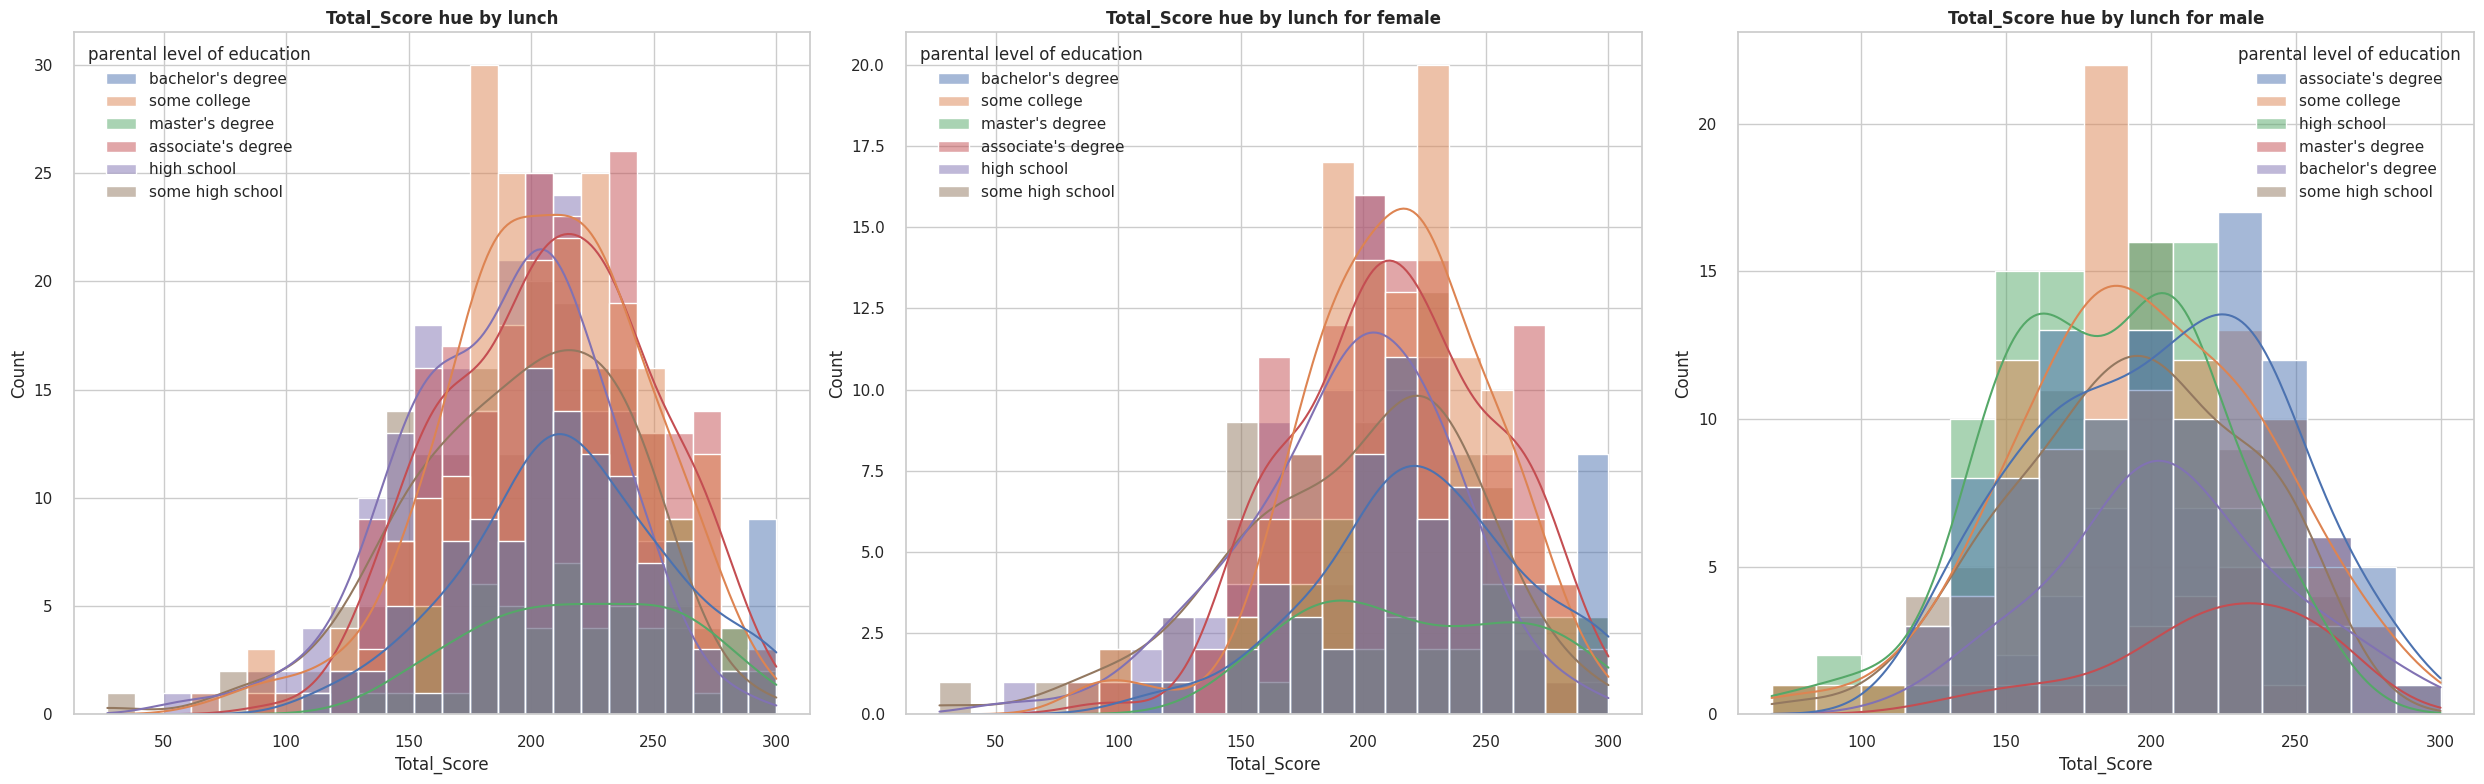

In [328]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.histplot(x=data['Total_Score'] , kde=True , hue =data["parental level of education"])
plt.title("Total_Score hue by lunch",fontweight="bold")

plt.subplot(132)
sns.histplot(data=data[data['gender']=='female'] , x='Total_Score',kde=True ,hue='parental level of education')
plt.title("Total_Score hue by lunch for female",fontweight="bold")

plt.subplot(133)
sns.histplot(data=data[data['gender']=='male'] , x='Total_Score',kde=True ,hue='parental level of education')
plt.title("Total_Score hue by lunch for male",fontweight="bold")

plt.tight_layout()
plt.show()

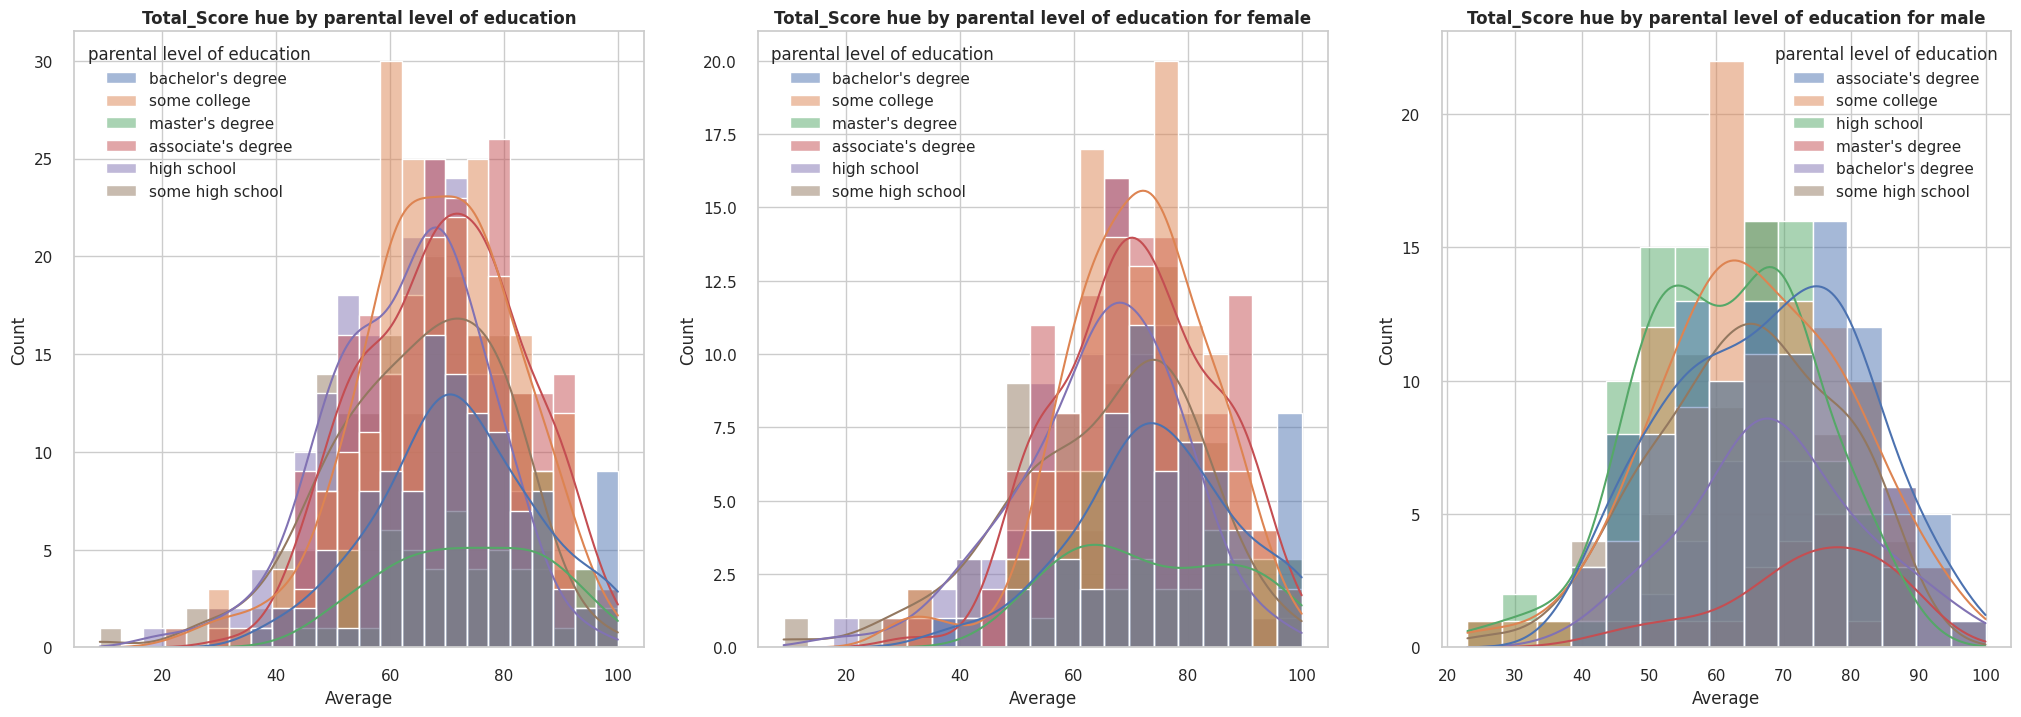

In [329]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
ax =sns.histplot(data=data,x='Average',kde=True,hue='parental level of education')
plt.title("Total_Score hue by parental level of education",fontweight="bold")

plt.subplot(132)
ax =sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.title("Total_Score hue by parental level of education for female",fontweight="bold")

plt.subplot(133)
ax =sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.title("Total_Score hue by parental level of education for male",fontweight="bold")

plt.show()

**Insights**

*   In general parent's education don't help student perform well in exam.
*   2nd plot shows that parent's whose education is of associate's degree or master's degree their female child tend to perform well in exam
*   3rd plot we can see there is no effect of parent's education on male students.

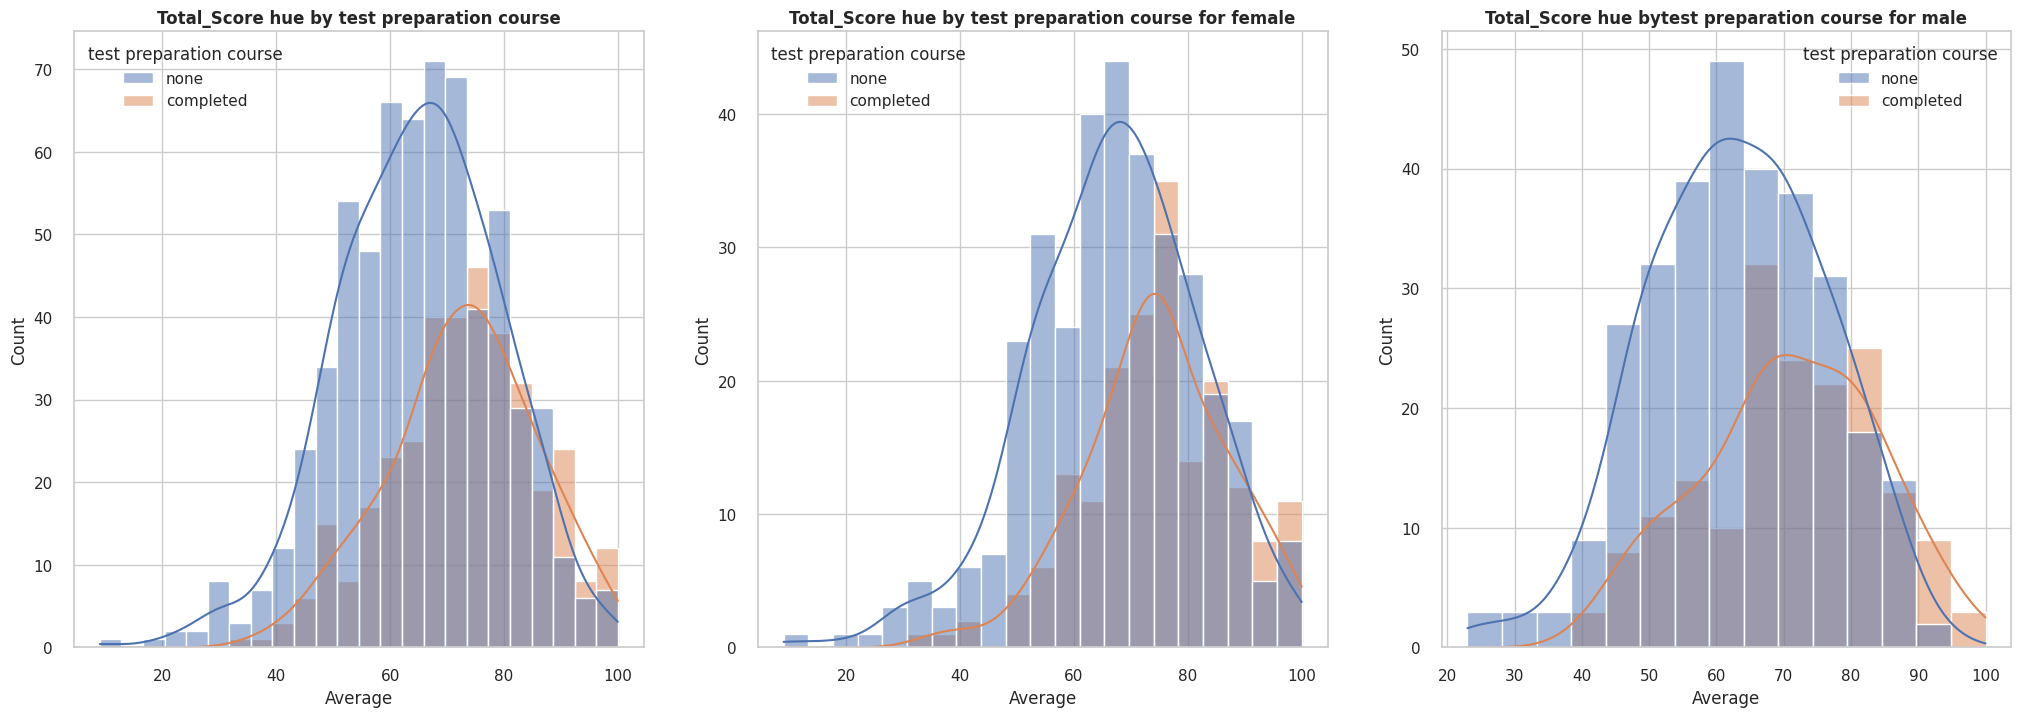

In [330]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
ax =sns.histplot(data=data,x='Average',kde=True,hue='test preparation course')
plt.title("Total_Score hue by test preparation course",fontweight="bold")

plt.subplot(132)
ax =sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='test preparation course')
plt.title("Total_Score hue by test preparation course for female",fontweight="bold")

plt.subplot(133)
ax =sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='test preparation course')
plt.title("Total_Score hue bytest preparation course for male",fontweight="bold")

plt.show()

**Insight**


*   Completed Test prepration Course student have good peformance



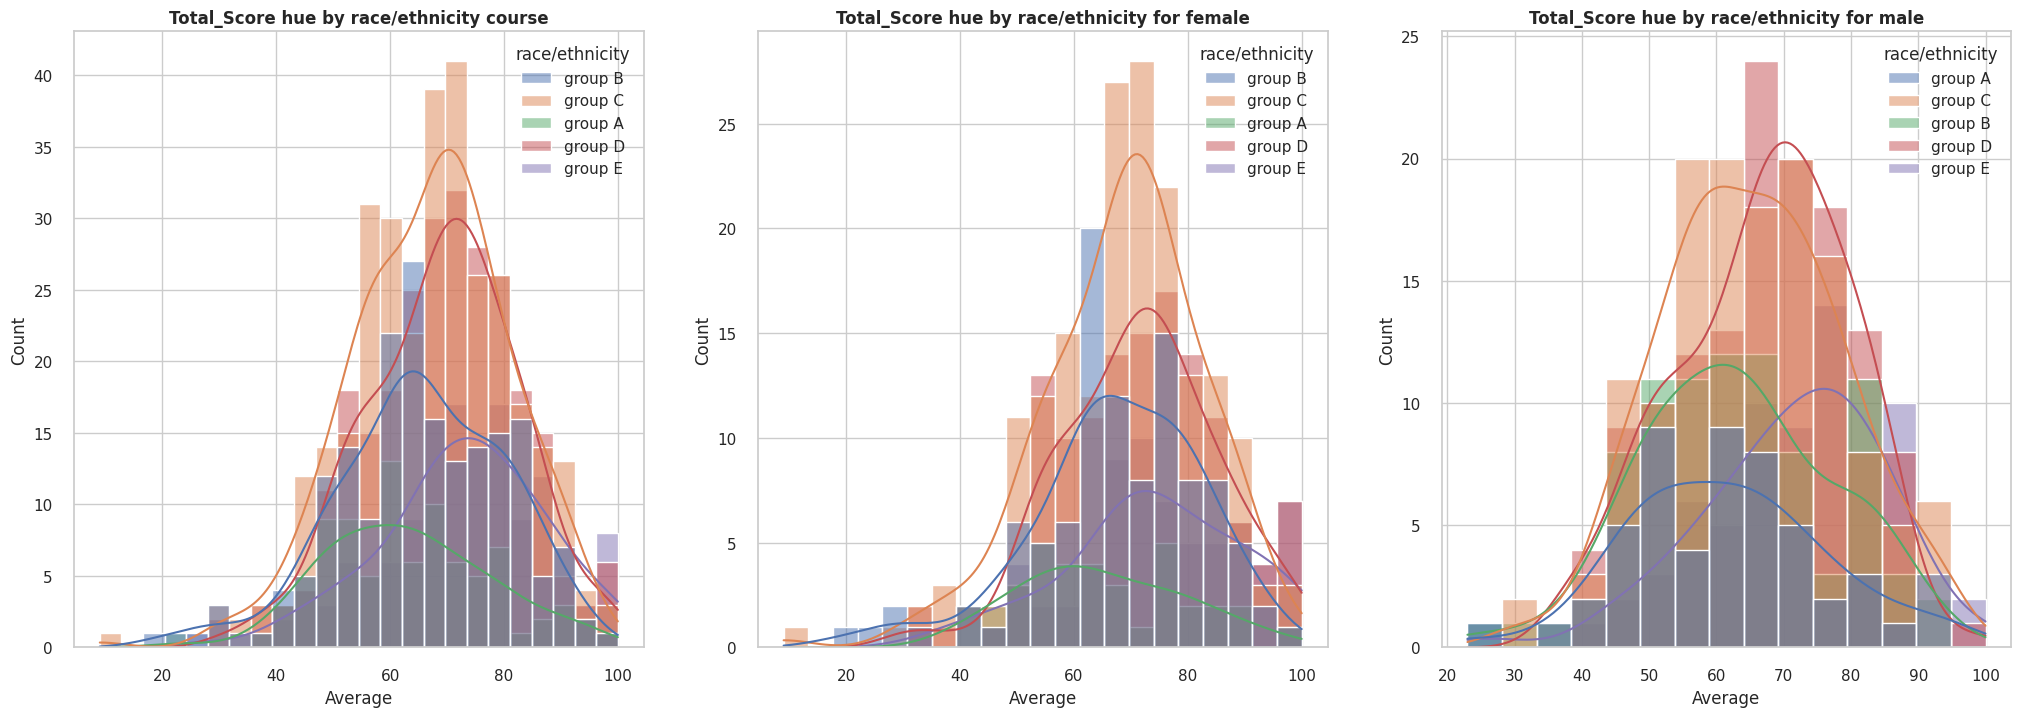

In [331]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
ax =sns.histplot(data=data,x='Average',kde=True,hue='race/ethnicity')
plt.title("Total_Score hue by race/ethnicity course",fontweight="bold")

plt.subplot(132)
ax =sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.title("Total_Score hue by race/ethnicity for female",fontweight="bold")

plt.subplot(133)
ax =sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.title("Total_Score hue by race/ethnicity for male",fontweight="bold")

plt.show()

**Insight**
*   Students of group A and group B tends to perform poorly in exam.
*   Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female



**Maximumum score of students in all three subjects**

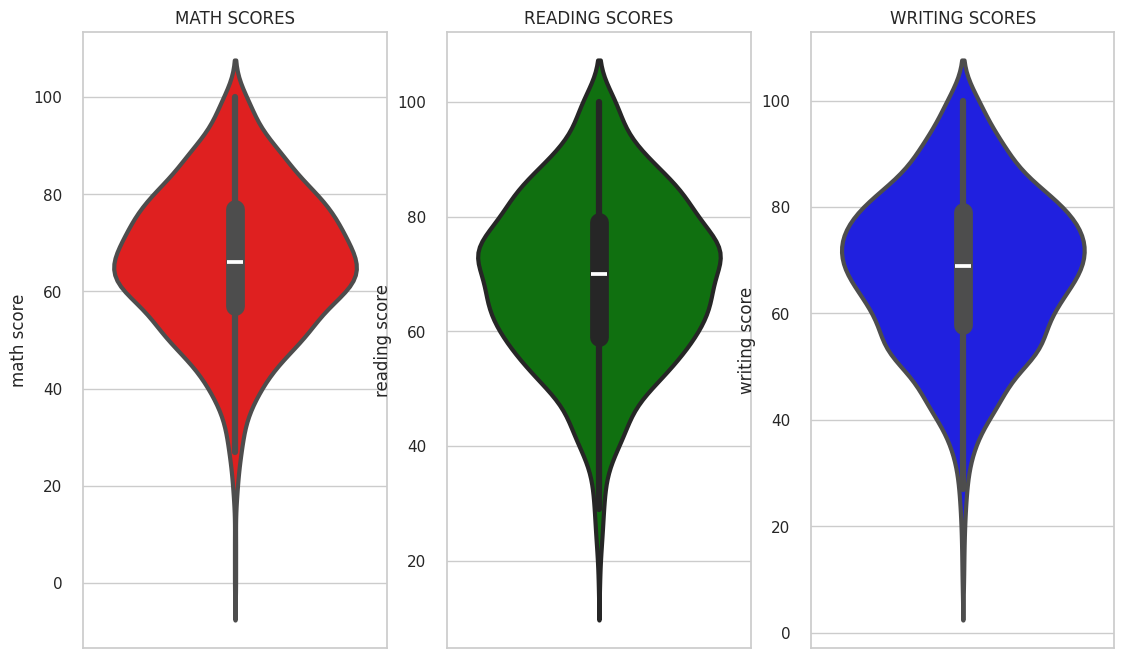

In [332]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)

plt.show()

**Insights**

*  From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80





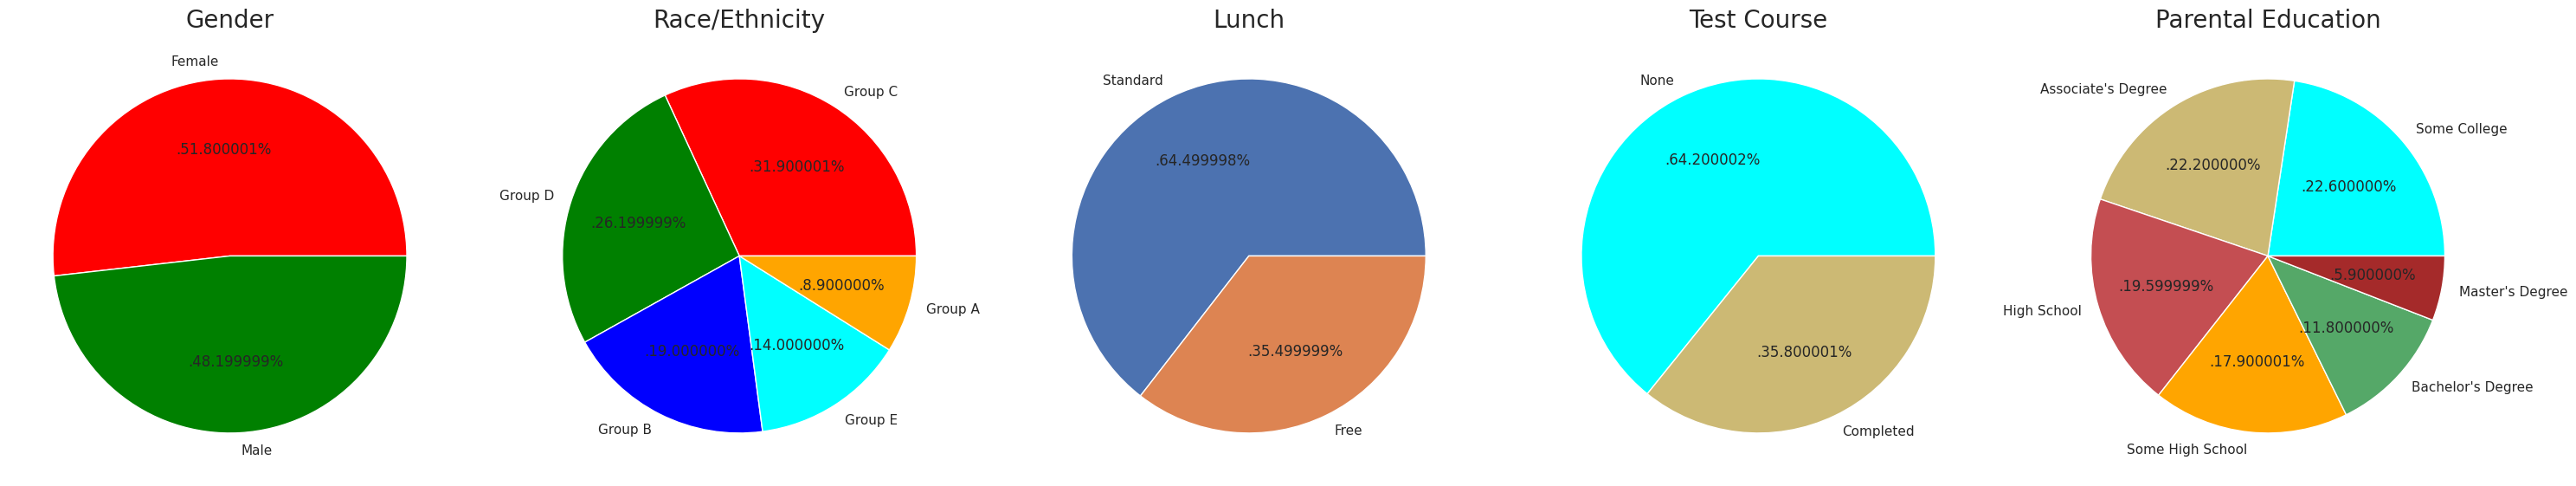

In [333]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red','green']


plt.pie(size, colors = colors, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
colors = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = colors,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'

plt.pie(size ,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
colors=['cyan',"y"]

plt.pie(size, colors = colors,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
colors=['cyan',"y" ,"r","orange","g" ,"brown"]

plt.pie(size, colors = colors,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights**

*   Number of Male and Female students is almost equal
*   Number students are greatest in Group C
*   Number of students who have standard lunch are greater
*   Number of students who have not enrolled in any test preparation course is greater
*   Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


**Feature Wise Visualization**

**GENDER COLUM**

*   How is distribution of Gender ?
*   Is gender has any impact on student's performance ?


**UNIVARIATE ANALYSIS ( How is distribution of Gender ? )**

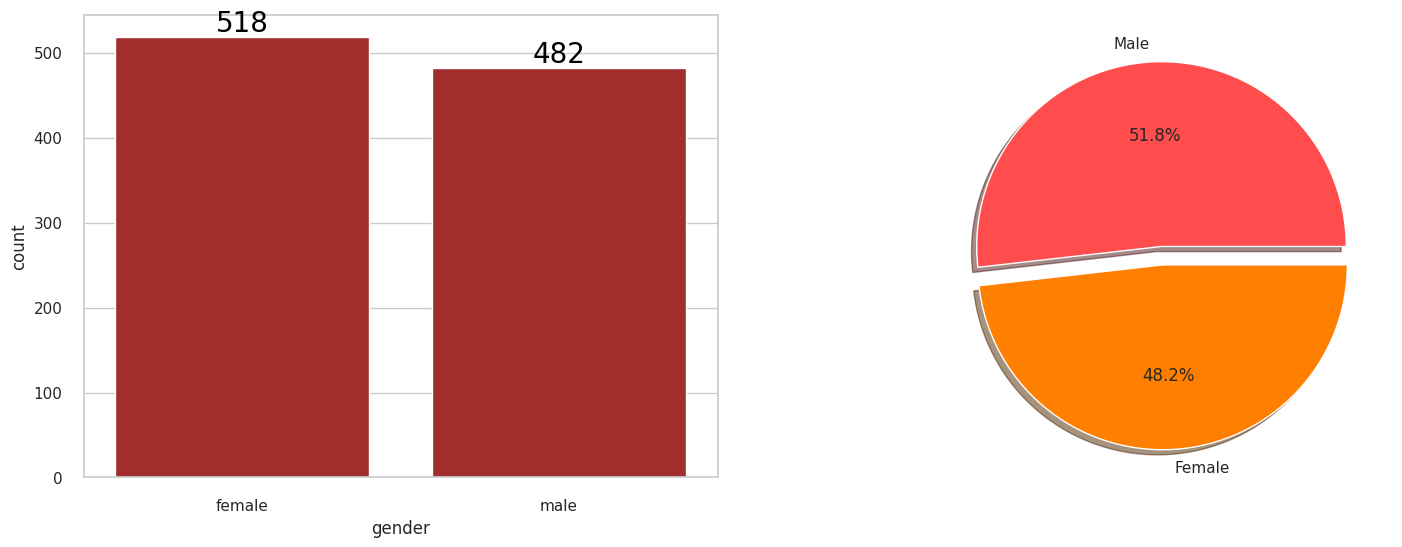

In [334]:
# Creating a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Count plot for gender
sns.countplot(x='gender', data=data, color='brown', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart for gender distribution
ax[1].pie(data['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])

# Displaying the plots
plt.show()


**Insights**
*    Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

**BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

In [335]:
gender_group = data.groupby('gender')['Average'].mean()
gender_group

,Average
gender,
female,69.569498
male,65.837483


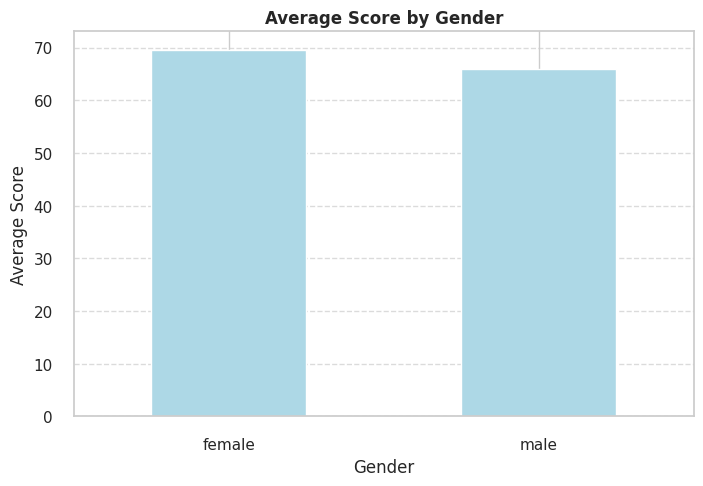

In [336]:
# Create a bar plot
plt.figure(figsize=(8, 5))  # Optional: Set figure size
gender_group.plot(kind="bar", color='lightblue')  # You can customize the color here
plt.title("Average Score by Gender", fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for clarity
plt.show()

In [337]:
# Group by gender and calculate mean, median, and standard deviation
gender_stats = data.groupby('gender').agg({
    'math score': ['mean', 'median', 'std'],
    'reading score': ['mean', 'median', 'std'],
    'writing score': ['mean', 'median', 'std'],
    'Average': ['mean', 'median', 'std']
})

print(gender_stats)


       math score                   reading score                    \
             mean median        std          mean median        std   
gender                                                                
female  63.633205   65.0  15.491453     72.608108   73.0  14.378245   
male    68.728216   69.0  14.356277     65.473029   66.0  13.931832   

       writing score                      Average                        
                mean median        std       mean     median        std  
gender                                                                   
female     72.467181   74.0  14.844842  69.569498  70.333333  14.541809  
male       63.311203   64.0  14.113832  65.837483  66.333333  13.698840  


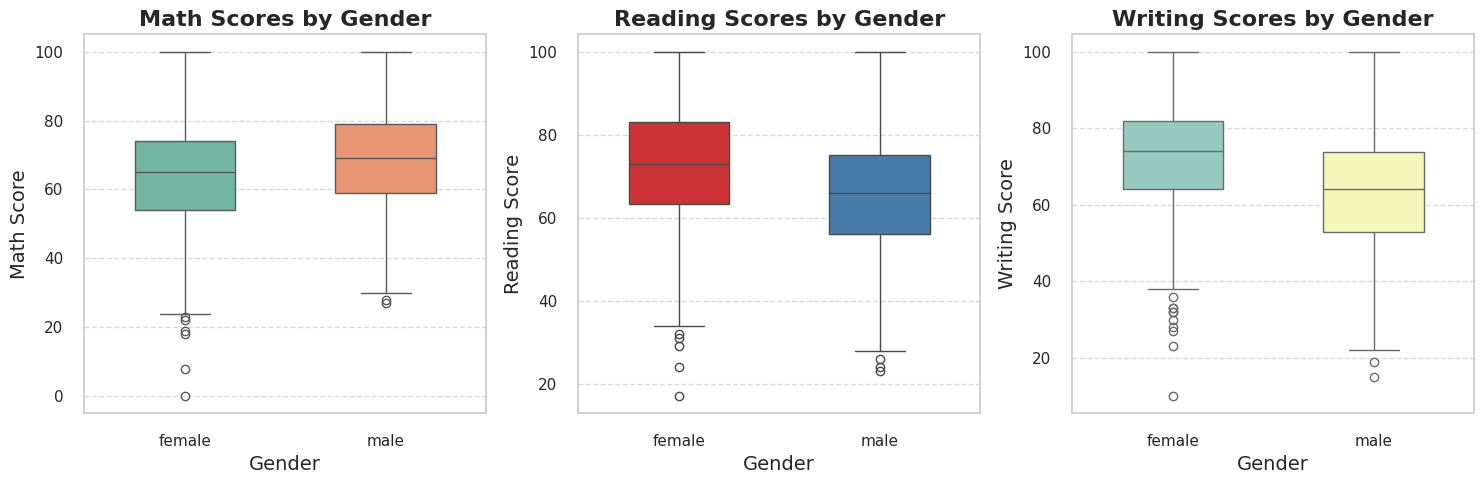

In [338]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

# Math Scores Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=data, palette='Set2', width=0.5)
plt.title('Math Scores by Gender', fontweight='bold', fontsize=16)
plt.ylabel('Math Score', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reading Scores Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=data, palette='Set1', width=0.5)
plt.title('Reading Scores by Gender', fontweight='bold', fontsize=16)
plt.ylabel('Reading Score', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Writing Scores Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=data, palette='Set3', width=0.5)
plt.title('Writing Scores by Gender', fontweight='bold', fontsize=16)
plt.ylabel('Writing Score', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


**Insight**


*   Female performance is good from male but also some number of females hava bad perfomance then male



**RACE/EHNICITY COLUMN**

*   How is Group wise distribution ?
*   Is Race/Ehnicity has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( How is Group wise distribution ?)**

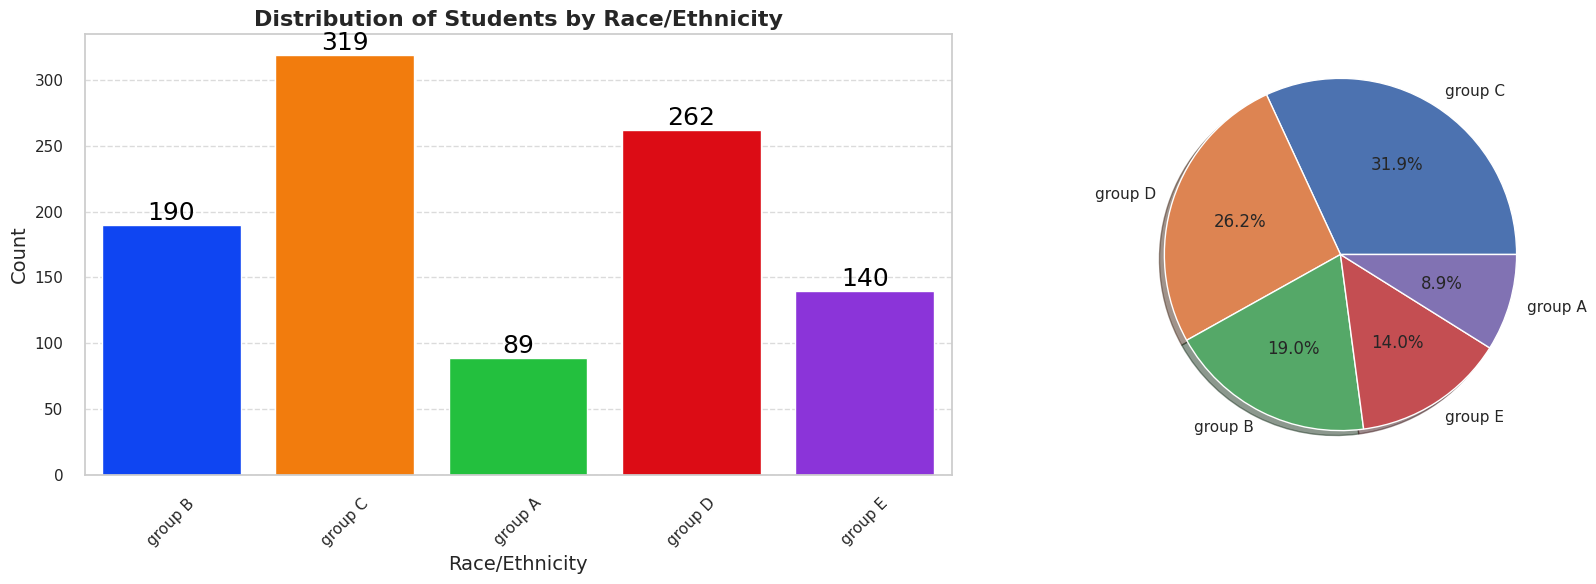

In [339]:
# Set aesthetic style
sns.set(style="whitegrid")

# Creating a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Count plot for race/ethnicity with a customized color palette
sns.countplot(x='race/ethnicity',  data=data, ax=ax[0] , palette='bright',saturation=0.9
)

# Customize plot appearance
ax[0].set_title("Distribution of Students by Race/Ethnicity", fontweight='bold', fontsize=16)
ax[0].set_xlabel("Race/Ethnicity", fontsize=14)
ax[0].set_ylabel("Count", fontsize=14)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=18)



# Pie chart for gender distribution

labels = 'group C', 'group D' , 'group B','group E','group A'
ax[1].pie(data['race/ethnicity'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Insights**

*   Most of the student belonging from group C /group D.
*   Lowest number of students belong to groupA.

In [340]:
race_group = data.groupby("race/ethnicity")["Average"].mean()
race_group

,Average
race/ethnicity,
group A,62.992509
group B,65.468421
group C,67.131661
group D,69.179389
group E,72.752381


**mean of group E student have more**

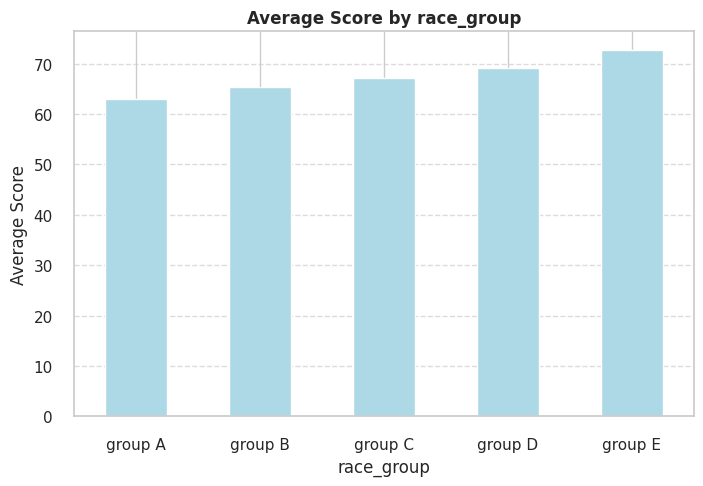

In [341]:
# Create a bar plot
plt.figure(figsize=(8, 5))  # Optional: Set figure size
race_group.plot(kind="bar", color='lightblue')  # You can customize the color here
plt.title("Average Score by race_group", fontweight='bold')
plt.xlabel("race_group")
plt.ylabel("Average Score")
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for clarity
plt.show()

**Insight**

*   Group E students have good performance




**BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )**

In [342]:
# Group by race/ethnicity and calculate mean, median, and standard deviation
race_state = data.groupby('race/ethnicity').agg({
    'math score': ['mean', 'median', 'std'],
    'reading score': ['mean', 'median', 'std'],
    'writing score': ['mean', 'median', 'std'],
    'Average': ['mean', 'median', 'std']
})

print(race_state)


               math score                   reading score                    \
                     mean median        std          mean median        std   
race/ethnicity                                                                
group A         61.629213   61.0  14.523008     64.674157   64.0  15.543762   
group B         63.452632   63.0  15.468191     67.352632   67.0  15.177499   
group C         64.463950   65.0  14.852666     69.103448   71.0  13.997033   
group D         67.362595   69.0  13.769386     70.030534   71.0  13.895306   
group E         73.821429   74.5  15.534259     73.028571   74.0  14.874024   

               writing score                      Average             \
                        mean median        std       mean     median   
race/ethnicity                                                         
group A            62.674157   62.0  15.468278  62.992509  61.333333   
group B            65.600000   67.0  15.625173  65.468421  65.000000   
group C

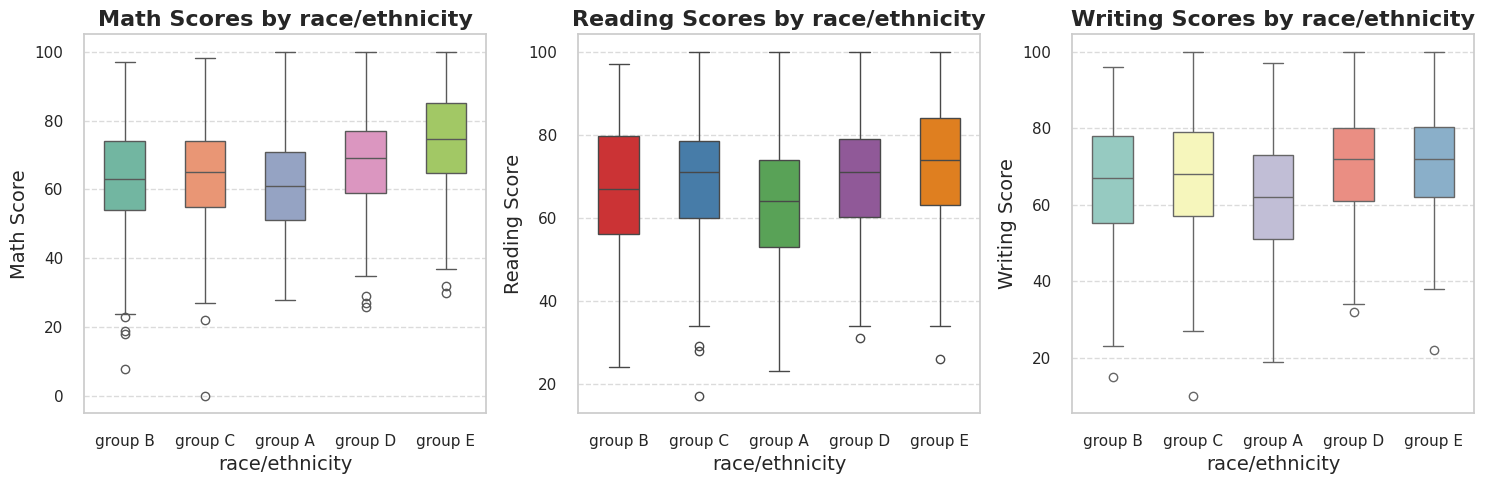

In [343]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

# Math Scores Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='race/ethnicity', y='math score', data=data, palette='Set2', width=0.5)
plt.title('Math Scores by race/ethnicity', fontweight='bold', fontsize=16)
plt.ylabel('Math Score', fontsize=14)
plt.xlabel('race/ethnicity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reading Scores Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x='race/ethnicity', y='reading score', data=data, palette='Set1', width=0.5)
plt.title('Reading Scores by race/ethnicity', fontweight='bold', fontsize=16)
plt.ylabel('Reading Score', fontsize=14)
plt.xlabel('race/ethnicity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Writing Scores Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x='race/ethnicity', y='writing score', data=data, palette='Set3', width=0.5)
plt.title('Writing Scores by race/ethnicity', fontweight='bold', fontsize=16)
plt.ylabel('Writing Score', fontsize=14)
plt.xlabel('race/ethnicity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


 **parental level of education**

*   What is educational background of student's parent ?
*   Is parental level of education	 has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( What is educational background of student's parent ?)**

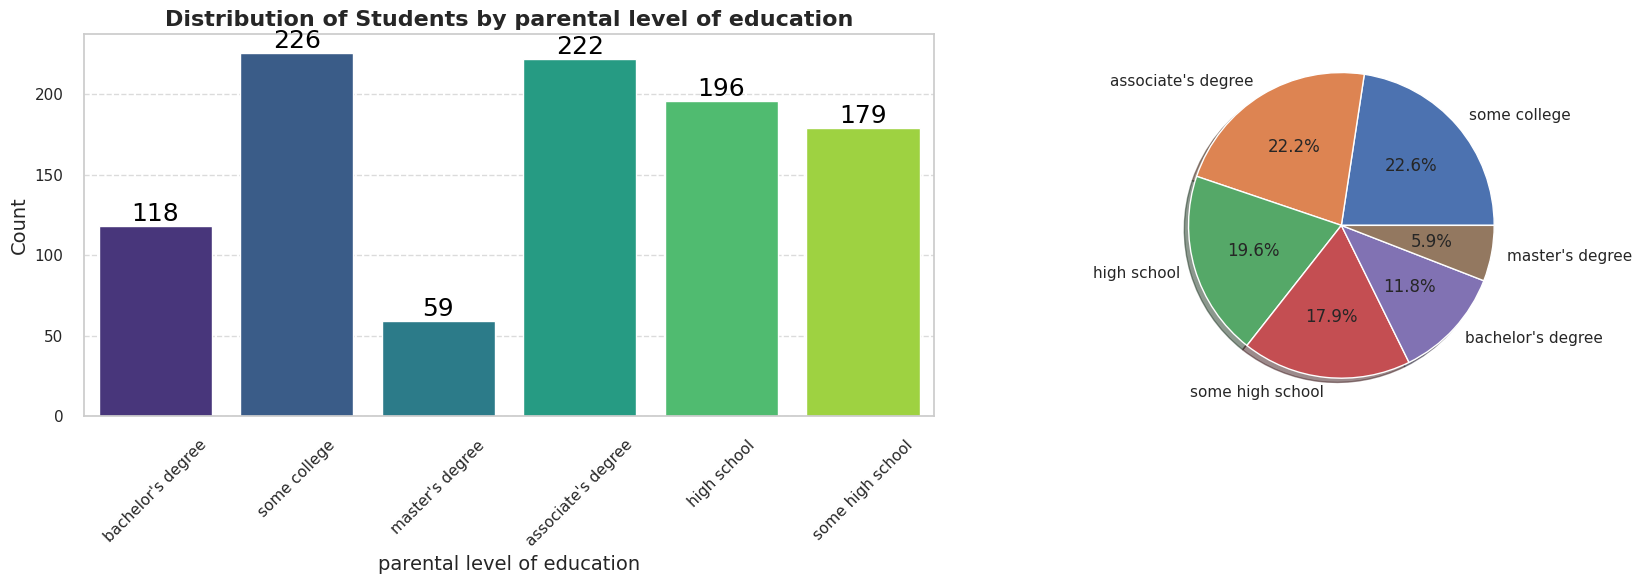

In [344]:
# Set aesthetic style
sns.set(style="whitegrid")

# Creating a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Count plot for race/ethnicity with a customized color palette
sns.countplot(x='parental level of education',  data=data, ax=ax[0] , palette='viridis',saturation=0.9
)

# Customize plot appearance
ax[0].set_title("Distribution of Students by parental level of education", fontweight='bold', fontsize=16)
ax[0].set_xlabel("parental level of education", fontsize=14)
ax[0].set_ylabel("Count", fontsize=14)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=18)



# Pie chart for gender distribution

labels = 'some college', "associate's degree",'high school','some high school',"bachelor's degree","master's degree"
ax[1].pie(data['parental level of education'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Insights**

*   Largest number of parents are from some college.

In [345]:
data.groupby('parental level of education')['Average'].mean()

,Average
parental level of education,
associate's degree,69.569069
bachelor's degree,71.923729
high school,63.096939
master's degree,73.598870
some college,68.476401
some high school,65.108007


**BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )**

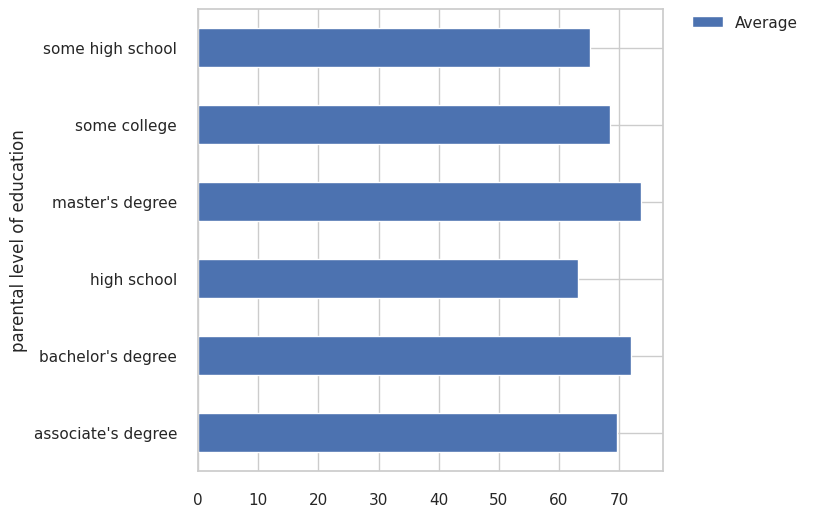

In [346]:
parental_group = data.groupby('parental level of education')['Average'].agg('mean')
parental_group.plot(kind='barh',figsize=(6,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**

*   The score of student whose parents possess master and bachelor level education are higher than others.

**LUNCH COLUMN**

*   Which type of lunch is most common amoung students ?
*   What is the effect of lunch type on test results?

**UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**

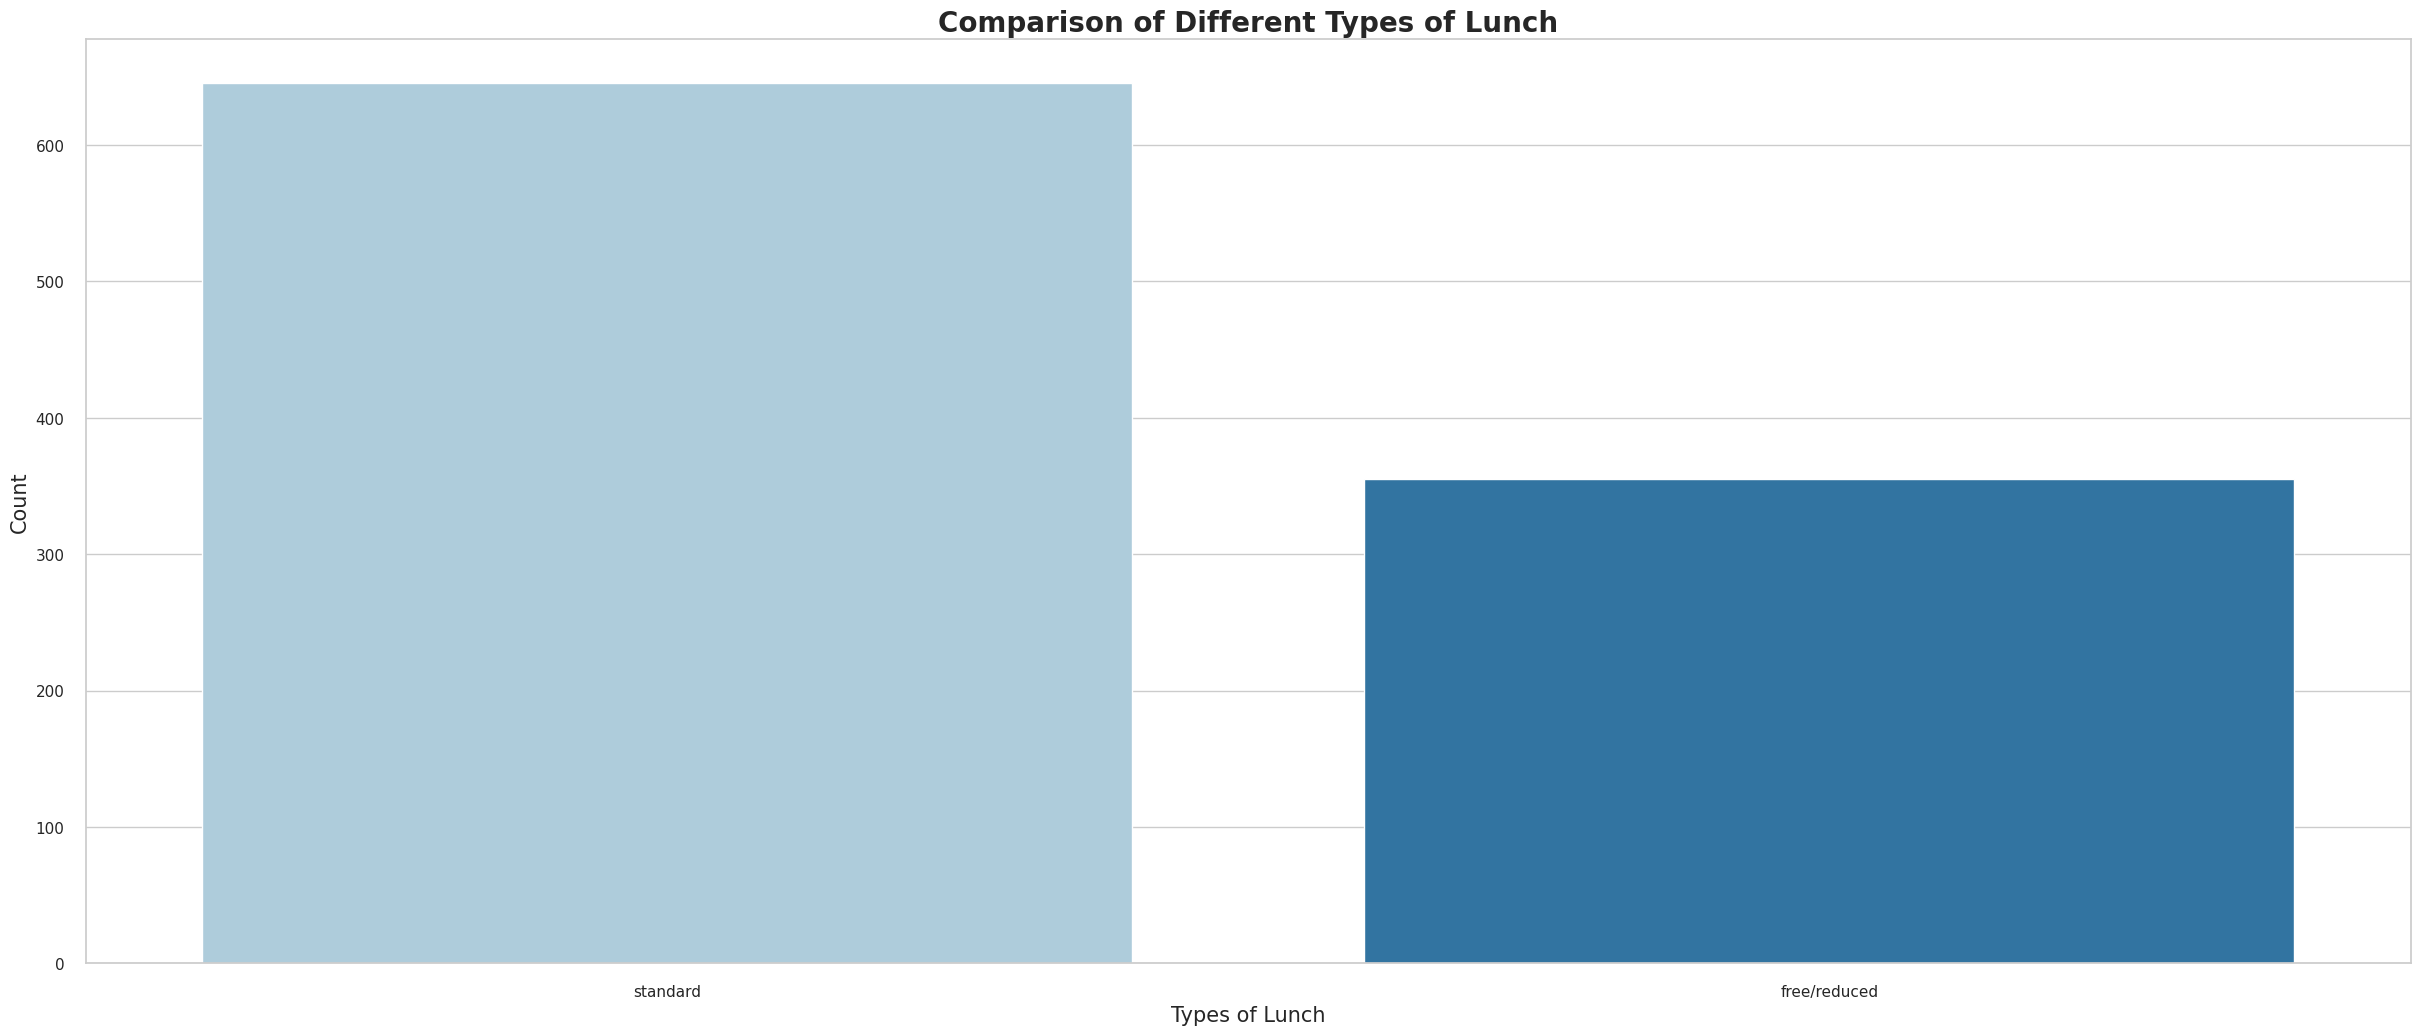

In [347]:
# Count plot for lunch types
sns.countplot(x='lunch', data=data, palette='Paired')
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


**Insights**

*   Students being served Standard lunch was more than free lunch

**BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )**

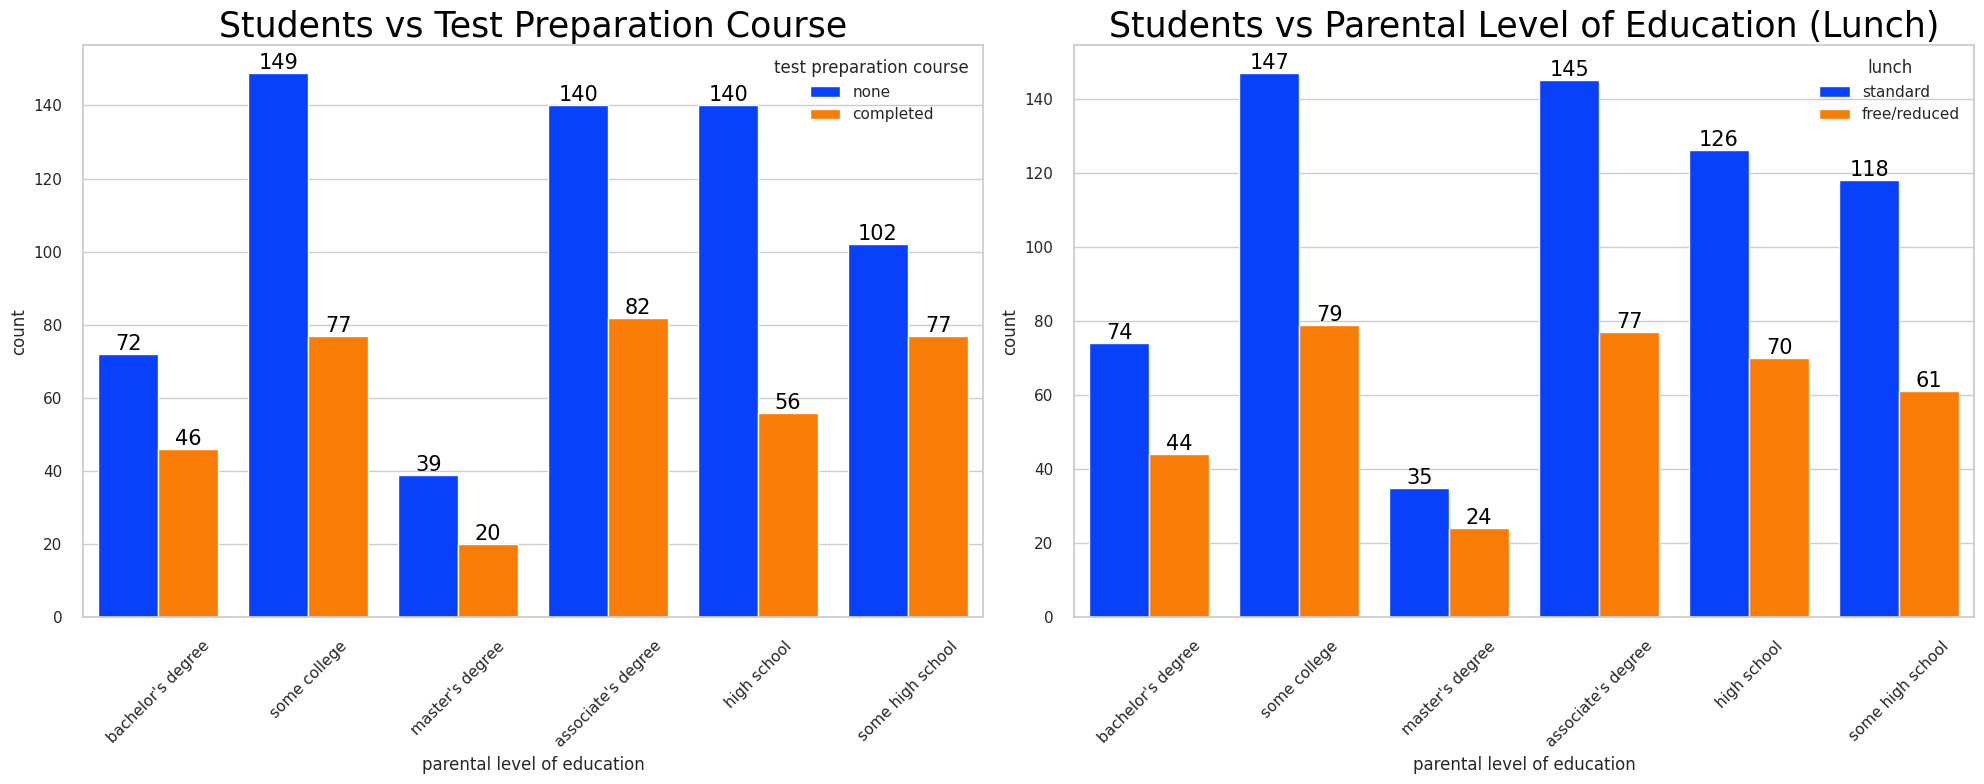

In [348]:
# Set up a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First count plot: Students vs Test Preparation Course
sns.countplot(x='parental level of education', data=data, hue='test preparation course', palette='bright', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Second count plot: Students vs Parental Level of Education (Lunch Comparison)
sns.countplot(x='parental level of education', data=data, hue='lunch', palette='bright', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Parental Level of Education (Lunch)', color='black', size=25)
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

**Insights**

*  Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

**TEST PREPARATION COURSE COLUMN**

*   Which type of lunch is most common amoung students ?
*   Is Test prepration course has any impact on student's performance ?





**BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )**

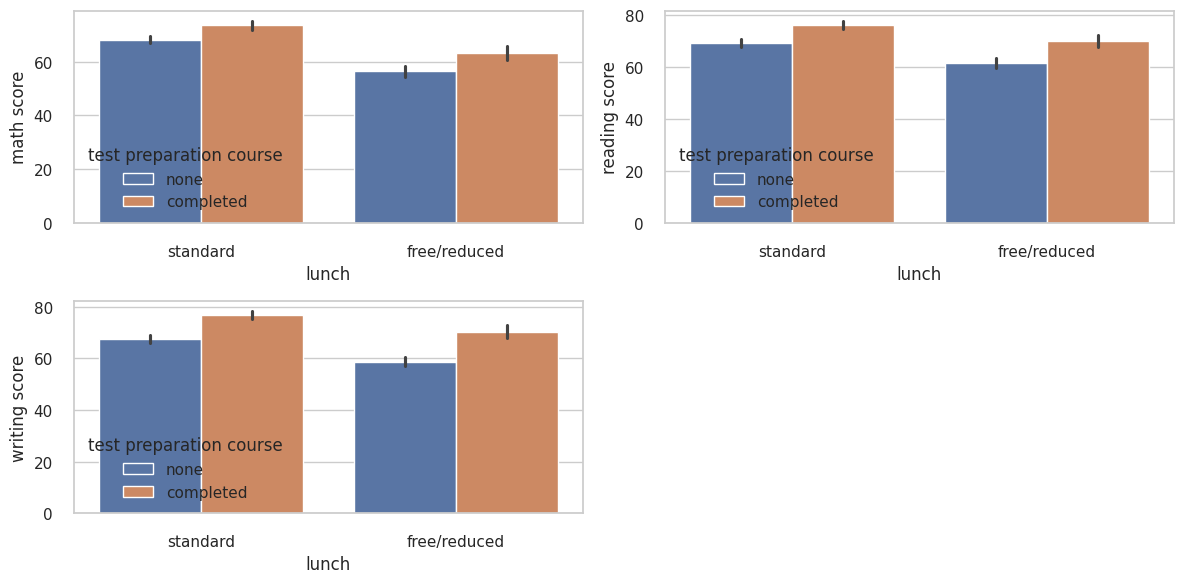

In [349]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math score'], hue=data['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading score'], hue=data['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing score'], hue=data['test preparation course'])

plt.tight_layout()
plt.show()

**Insights**

*   Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

**CHECKING OUTLIERS**

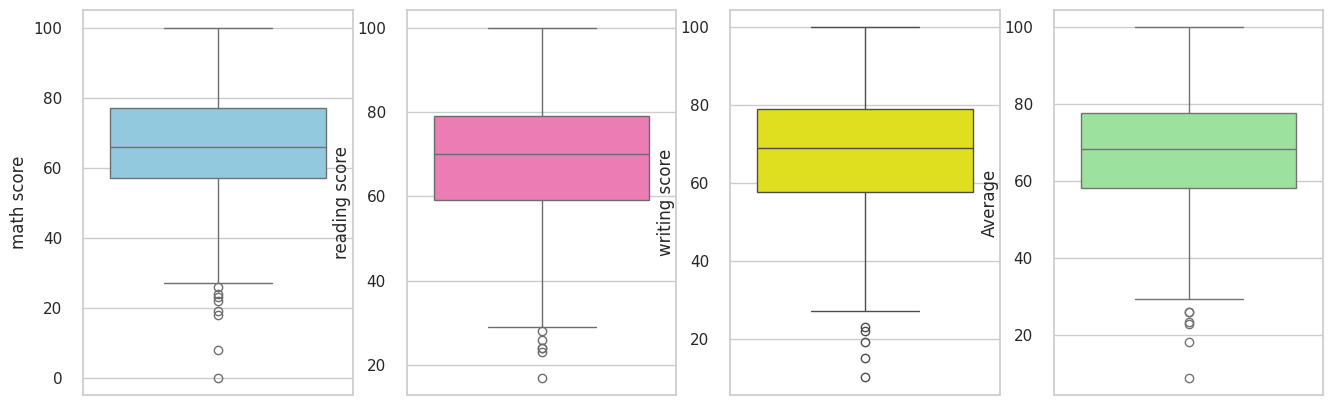

In [350]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average'],color='lightgreen')
plt.show()

**MUTIVARIATE ANALYSIS USING PAIRPLOT**

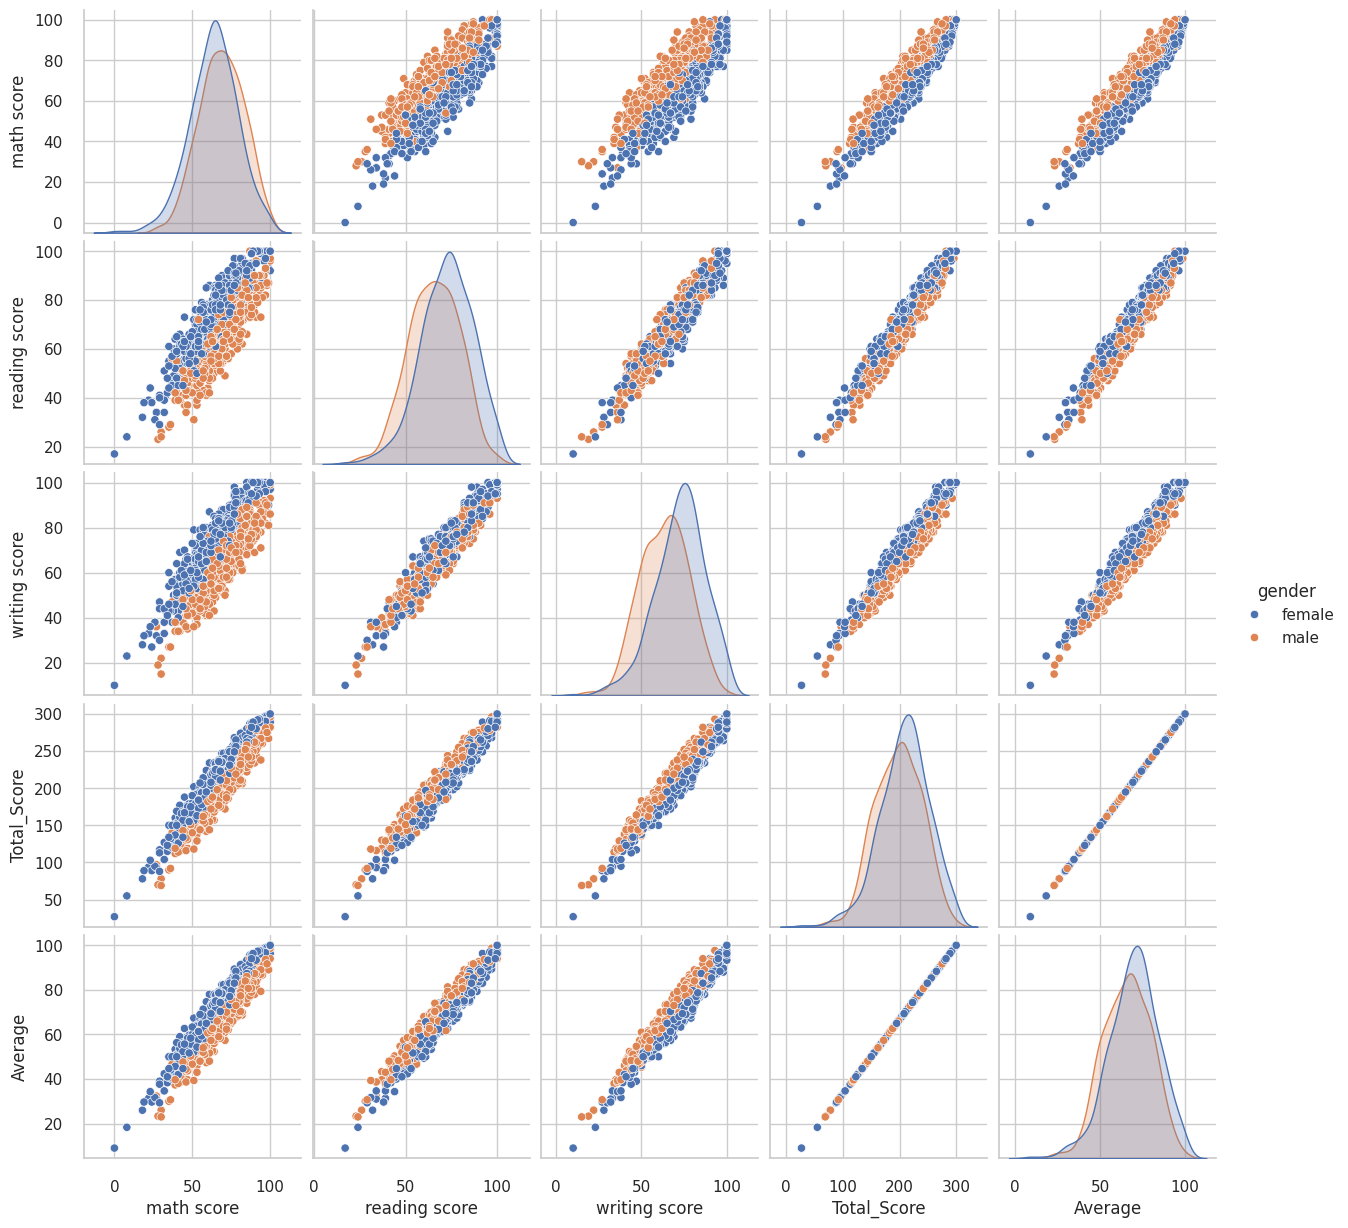

In [351]:
sns.pairplot(data,hue = 'gender')
plt.show()

**Insights**

*   From the above plot it is clear that all the scores increase linearly with each other.

**Conclusions**

*   Student's Performance is related with lunch, race, parental level education
*   Females lead in pass percentage and also are top-scorers
*   Student's Performance is not much related with test preparation course
*   Finishing preparation course is benefitial.

# **MODEL TRAIING**

In [352]:
# Dropping specified columns from X
X = data.drop(columns=["Average", "Total_Score", "math score"])

# Setting the target variable Y
Y = data["math score"]

In [353]:
X.shape
Y.shape

(1000,)

In [354]:
X.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [355]:
Y.head(5)

,math score
0,72
1,69
2,90
3,47
4,76


In [356]:
num_columns = X.select_dtypes(exclude='object').columns
cat_columns = X.select_dtypes(include='object').columns

In [357]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

In [358]:
OHEncoder = OneHotEncoder()
scaler = StandardScaler()

In [359]:
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder' , OHEncoder , cat_columns),
        ('StandardScaler',scaler ,num_columns)
    ]
)
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [360]:
X=preprocessor.fit_transform(X)

In [361]:
X.shape

(1000, 19)

In [362]:
x_train,x_test,y_train,y_test =train_test_split(X,Y , test_size = 0.2 ,random_state =42)

In [363]:
def evaluation_model(true , pred):
  mae = mean_absolute_error(true , pred)
  mse = mean_squared_error(true , pred)
  rmse = np.sqrt(mse)
  R2_score =r2_score(true , pred)

  return mae ,mse ,rmse ,R2_score

In [364]:
models = {
    'LinearRegression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'DecisionTree' : DecisionTreeRegressor(),
    'RandomForest' : RandomForestRegressor(),
    'SVR' : SVR(),
    'XGBoost' : XGBRegressor(),
    'KNN' : KNeighborsRegressor(),
    'Adaboost' : AdaBoostRegressor(),
    'Catboost' : CatBoostRegressor(verbose=False)
    }

In [365]:
model_list =[]
R2_Score = []

for i in range(len(list(models))):
  model = list((models.values()))[i]
  model.fit(x_train ,y_train) #Train model

  #predict model
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Evaluate Train and Test dataset
  model_train_mae , model_train_mse , model_train_rmse ,model_train_R2_score = evaluation_model(y_train , y_train_pred)
  model_test_mae , model_test_mse ,model_test_rmse ,model_test_R2_score = evaluation_model(y_test , y_test_pred)


  print(list((models.keys()))[i])
  model_list.append(list(models.keys())[i])
  print("Model performance for Training Set")
  print("-Mean Absolute Error {:.4f}".format(model_train_mae))
  print("-Mean Squared Error {:.4f}".format(model_train_mse))
  print("-Root Mean Squared Error {:.4f}".format(model_train_rmse))
  print("-R2 Score {:.4f}".format(model_train_R2_score))

  print("-------------------------------------------------------")

  print("Model performance for Test Set")
  print("-Mean Absolute Error {:.4f}".format(model_test_mae))
  print("-Mean Squared Error {:.4f}".format(model_test_mse))
  print("-Root Mean Squared Error {:.4f}".format(model_test_rmse))
  print("-R2 Score {:.4f}".format(model_test_R2_score))
  R2_Score.append(model_test_R2_score)

  print("="*35)
  print("\n")





LinearRegression
Model performance for Training Set
-Mean Absolute Error 4.2694
-Mean Squared Error 28.3779
-Root Mean Squared Error 5.3271
-R2 Score 0.8741
-------------------------------------------------------
Model performance for Test Set
-Mean Absolute Error 4.2195
-Mean Squared Error 29.3608
-Root Mean Squared Error 5.4186
-R2 Score 0.8793


Lasso
Model performance for Training Set
-Mean Absolute Error 5.2063
-Mean Squared Error 43.4784
-Root Mean Squared Error 6.5938
-R2 Score 0.8071
-------------------------------------------------------
Model performance for Test Set
-Mean Absolute Error 5.1579
-Mean Squared Error 42.5064
-Root Mean Squared Error 6.5197
-R2 Score 0.8253


Ridge
Model performance for Training Set
-Mean Absolute Error 4.2650
-Mean Squared Error 28.3378
-Root Mean Squared Error 5.3233
-R2 Score 0.8743
-------------------------------------------------------
Model performance for Test Set
-Mean Absolute Error 4.2111
-Mean Squared Error 29.0563
-Root Mean Squared E

**Results**

In [366]:
pd.DataFrame(list(zip(model_list,R2_Score)),columns =['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending = False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879342
9,Catboost,0.851632
8,Adaboost,0.850378
4,RandomForest,0.849157
6,XGBoost,0.827797
1,Lasso,0.825320
7,KNN,0.782192
3,DecisionTree,0.749937
5,SVR,0.728600


# **LinearRegression**

In [367]:
model_LR = LinearRegression()
model_LR.fit(x_train , y_train)

LinearRegression()

In [368]:
y_pred = model_LR.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("R2 score of the model is %.2f" %score)

R2 score of the model is 87.93


**Plot y_pred and y_test**

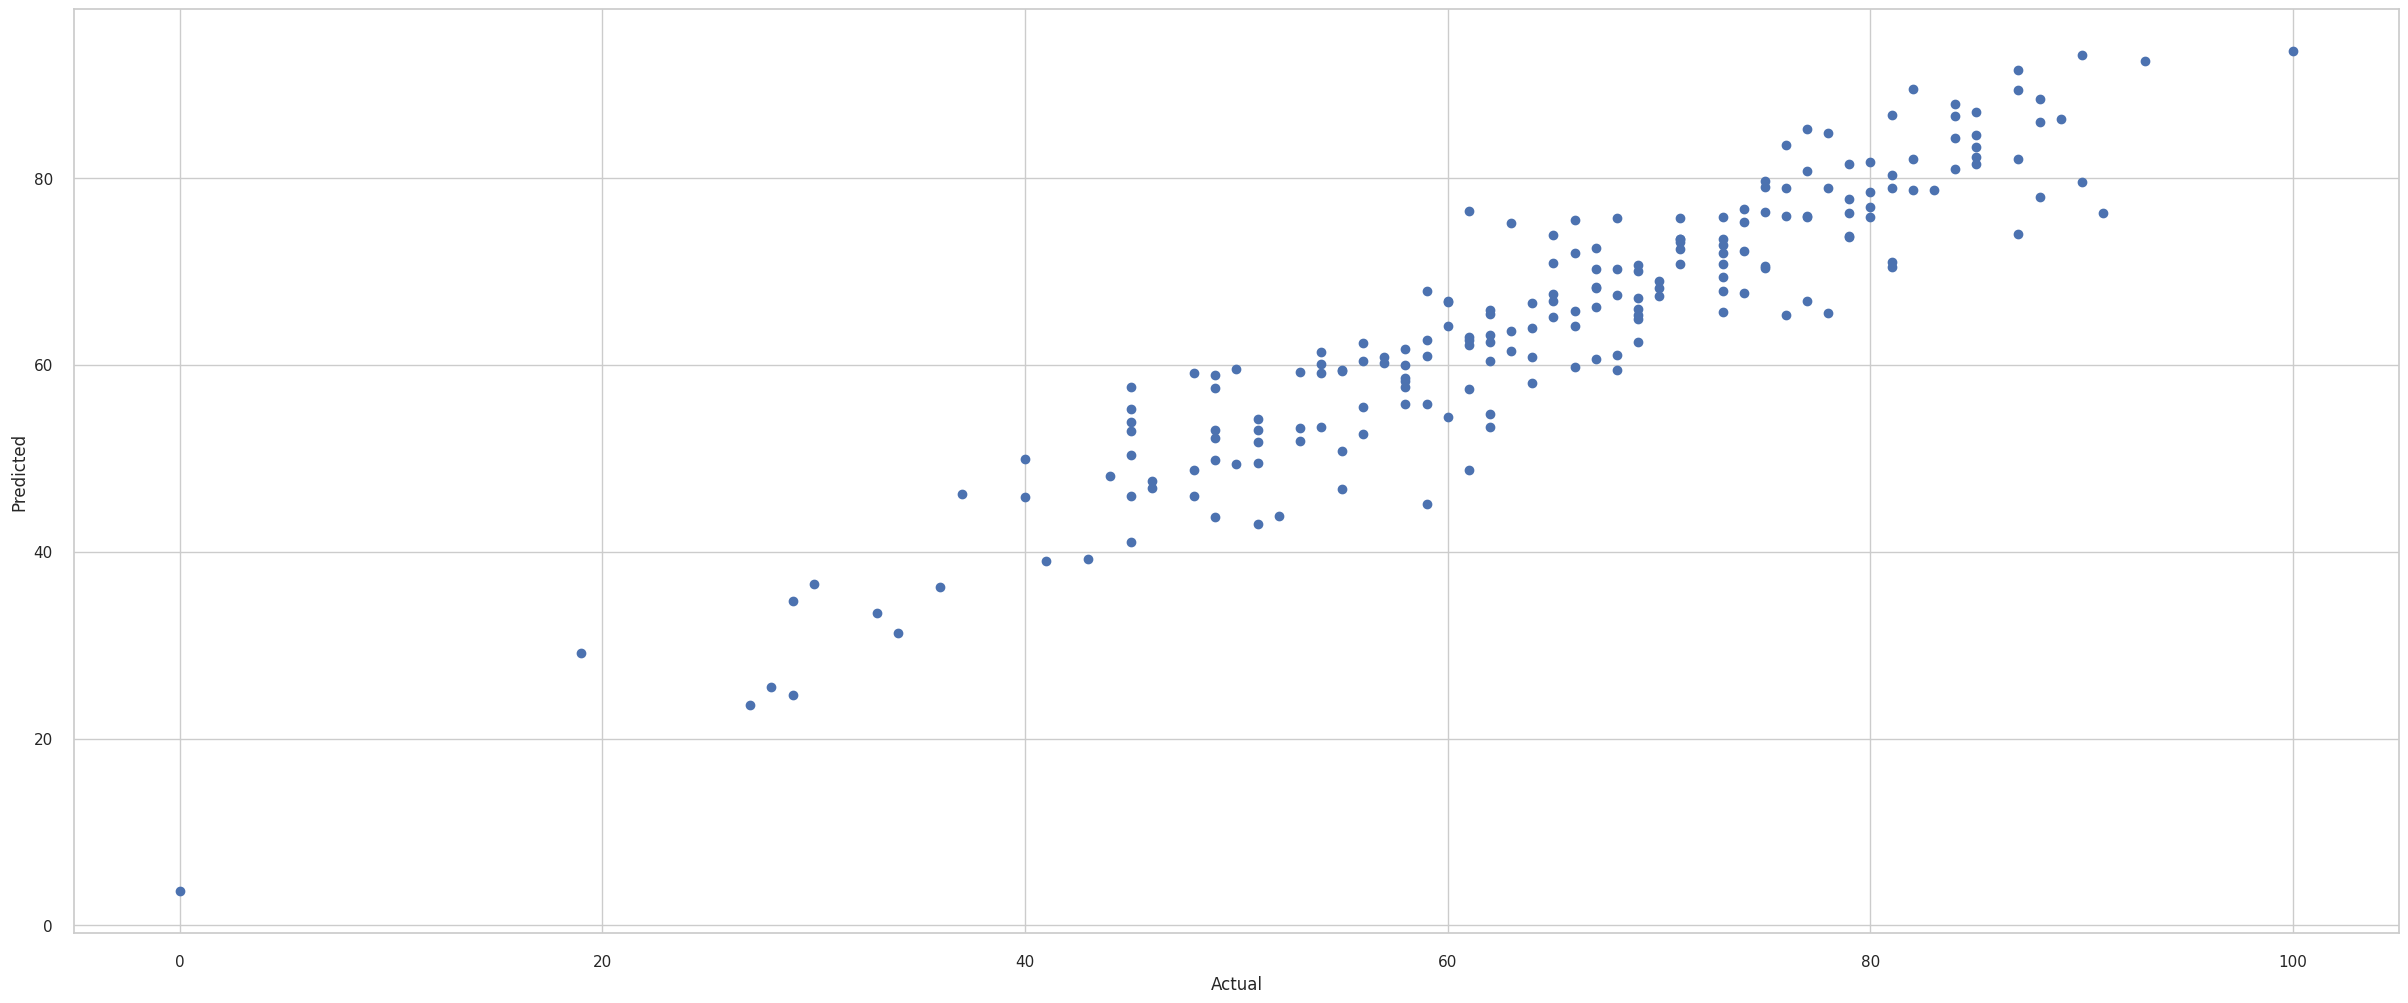

In [369]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

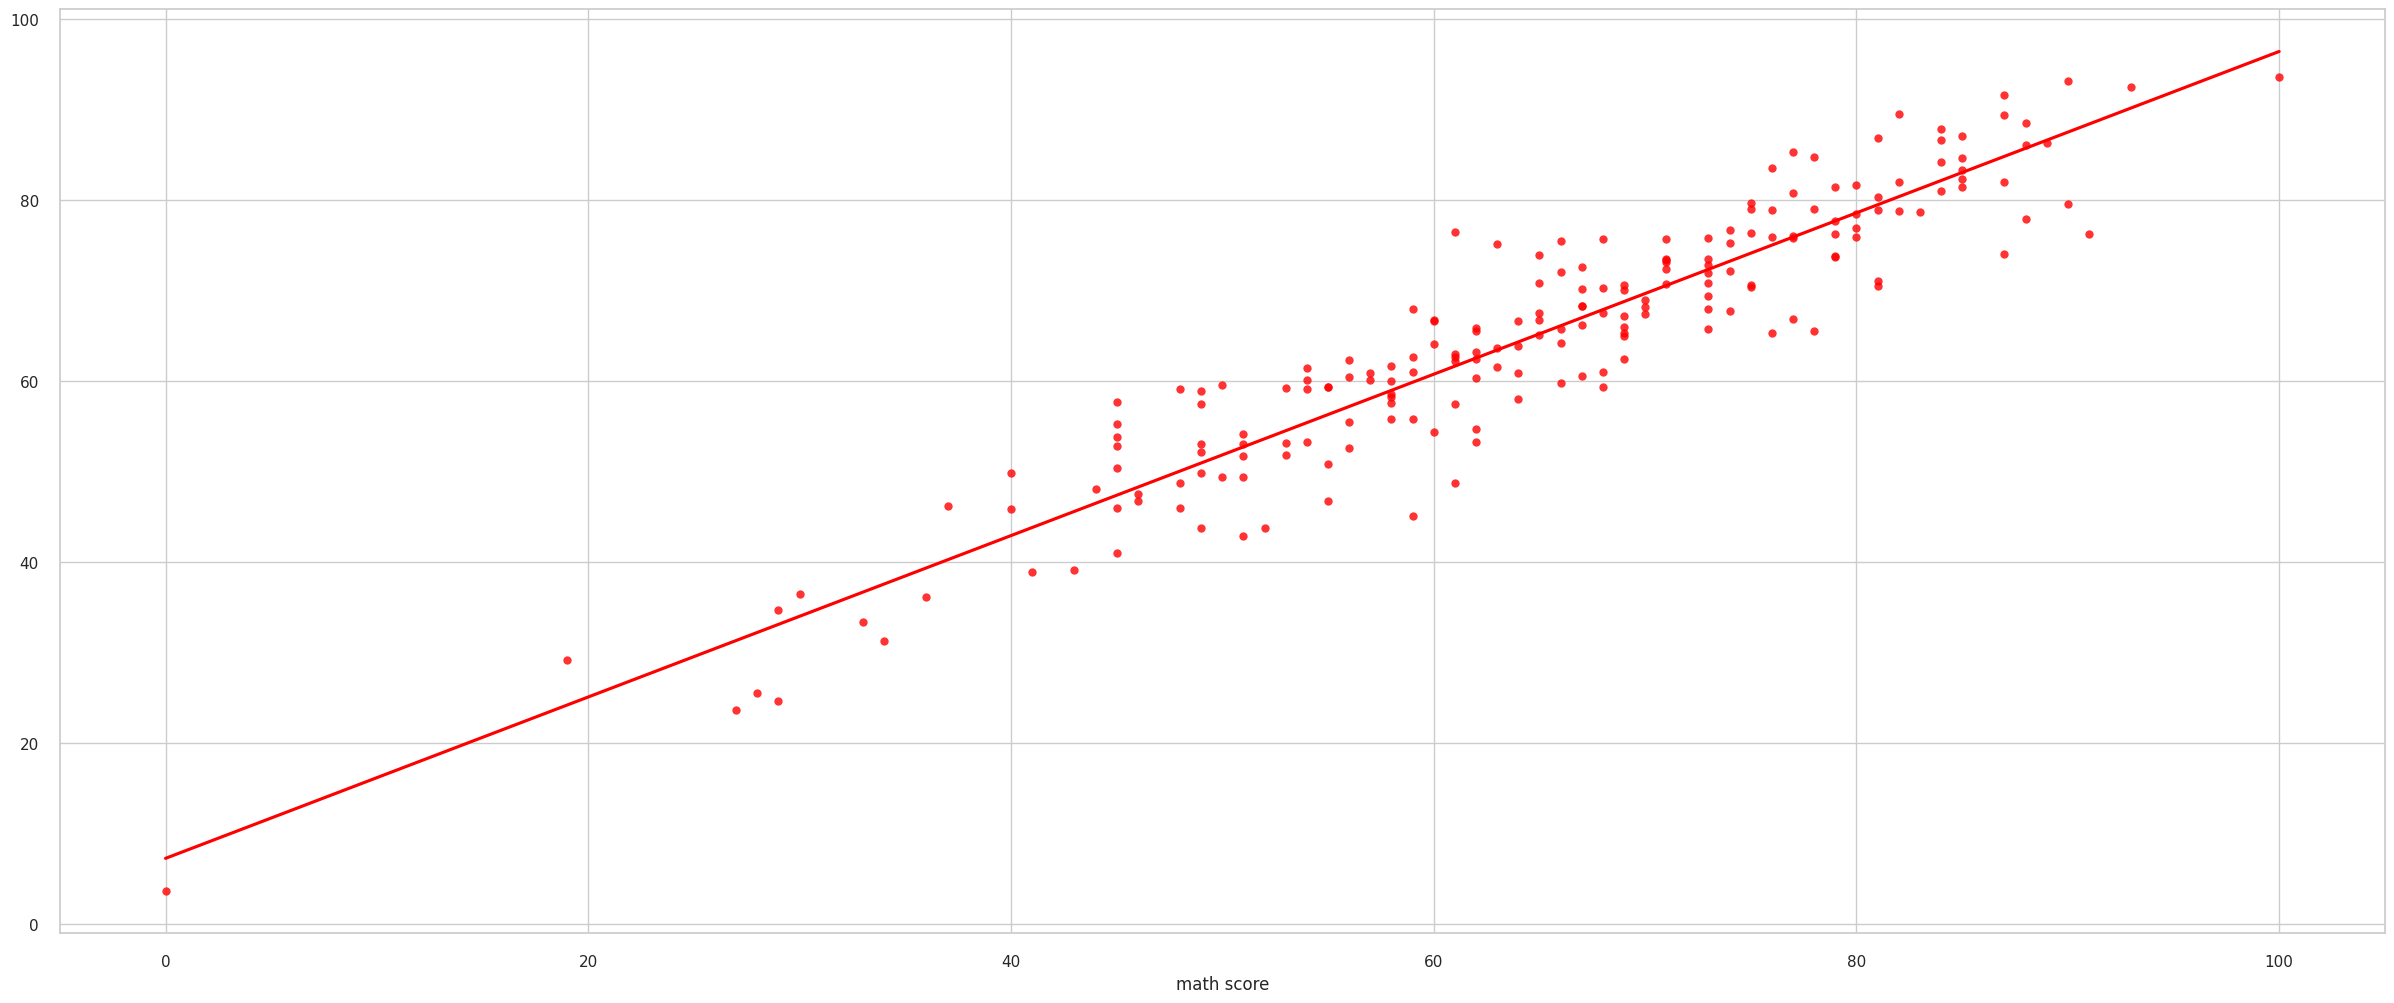

In [370]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

**Difference between Actual and Predicted Values**

In [371]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.21875,14.78125
737,53,59.21875,-6.21875
740,80,76.90625,3.09375
660,74,76.71875,-2.71875
411,84,87.90625,-3.90625
...,...,...,...
408,52,43.81250,8.18750
332,62,62.40625,-0.40625
208,74,67.75000,6.25000
613,65,66.81250,-1.81250


#**Hyper Param Tunning**

In [372]:
parameters ={ 'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, -1]
     }

In [373]:
random_search = RandomizedSearchCV(estimator=model_LR,param_distributions=parameters,n_iter=100,cv=5,verbose=2)

In [374]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..........copy_X=True, fit_intercept=True, n_jobs=1; total time=   0.0s
[CV] END ..........copy_X=True, fit_intercept=True, n_jobs=1; total time=   0.0s
[CV] END ..........copy_X=True, fit_intercept=True, n_jobs=1; total time=   0.0s
[CV] END ..........copy_X=True, fit_intercept=True, n_jobs=1; total time=   0.0s
[CV] END ..........copy_X=True, fit_intercept=True, n_jobs=1; total time=   0.0s
[CV] END .........copy_X=True, fit_intercept=True, n_jobs=-1; total time=   0.0s
[CV] END .........copy_X=True, fit_intercept=True, n_jobs=-1; total time=   0.0s
[CV] END .........copy_X=True, fit_intercept=True, n_jobs=-1; total time=   0.0s
[CV] END .........copy_X=True, fit_intercept=True, n_jobs=-1; total time=   0.0s
[CV] END .........copy_X=True, fit_intercept=True, n_jobs=-1; total time=   0.0s
[CV] END .........copy_X=True, fit_intercept=False, n_jobs=1; total time=   0.0s
[CV] END .........copy_X=True, fit_intercept=Fals

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=100,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, -1]},
                   verbose=2)

In [375]:
random_search.best_params_

{'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [376]:
random_search.best_score_

0.8681286504458555

In [377]:
prediction = random_search.predict(x_test)

In [378]:
R2_Score =r2_score(y_test,prediction)
R2_Score

0.8793416671431122